In [1]:
# impoting some libraries to prevent warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries for understanding the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
# importing the data from csv file
airline_dataframe = pd.read_csv('airline-passenger-traffic.csv', header = None)

In [4]:
# checking the head of the data
airline_dataframe.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
# checking the shape of the data
airline_dataframe.shape

(144, 2)

In [6]:
# renaming the column names of the dataframe
airline_dataframe.columns = ['Month', 'Passengers']

In [7]:
# checking the info of the dataframe
airline_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# converting the data type of month column into date time column
airline_dataframe['Month'] = pd.to_datetime(airline_dataframe['Month'], format= '%Y-%m')

In [9]:
# setting the index of the dataframe to month column
airline_dataframe.set_index('Month', inplace = True)

In [10]:
# checking the head of the dataframe after final conversions
airline_dataframe.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


- The above data is said to be time series data as it contains data points or observations which span over the time and are equally spaced in time. In short the data contains a time component and hence it can be said to be time series data. Let's perform time series analysis in order to check for the patterns present in the data thereby get some insights from the data. Then upon modelling we can make predictions about the future or forecasts which is said to be time series forecasting.

## Time Series Analysis

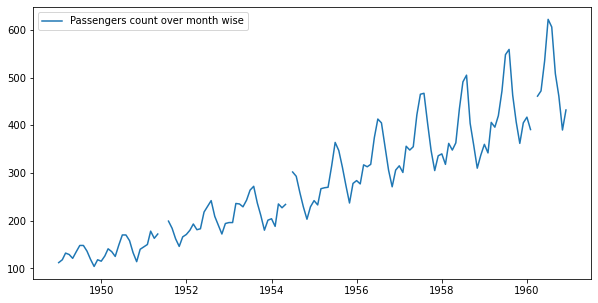

In [11]:
# plotting the data across the months
plt.figure(figsize= (10,5))
plt.plot(airline_dataframe['Passengers'], label = 'Passengers count over month wise')
plt.legend(loc= 0)
plt.show()

- From above we can see that the time series data has been plotted for 12 years and there exists a increasing trend in number of passengers every year. Also, there exists some kind of seasonality present in every year being affected by the seasons present in year. Also, we can see that there exists some missing values within the data for example for the year 1951, 1955, 1961 the data is missing as we can see some gaps in between them. Let's perform some missing values treatment and fill those gaps with suitable aggregated values.

In [12]:
# checking for the missing values in the data
airline_dataframe.loc[airline_dataframe['Passengers'].isnull(), 'Passengers']

Month
1951-06-01   NaN
1951-07-01   NaN
1954-06-01   NaN
1960-03-01   NaN
Name: Passengers, dtype: float64

- These are the missing values that we have seen visually in above plot. The possible reasons for having missing values are:<br> 
1) MNAR <br>
2) MAR <br>
If the missing values happend not at random and have some specific reason to that then such missing values will be considered as missing values not at random. For example if these missing values have been caused because of non operational of business in such these missing values have occured because of a specific cause. On the other hand missing values occuring at random. Upon having some sudden system failure and due to some human error these missing values happen at random. Such missing values doesn't have one specific reason for being missing. In order to treat  missing values happend at random due to whcih we couldn't able to record the data in such case we perform missing values imputations.<br><br>

- Some of the missing values treatment methods are : 
    - Imputing missing values with mean of the overall time series data which is called as __Mean Imputation__. Doing so we will not be taking into consideration of trend and seasonality of the time series data. As a result there exists under and over estimation of missing values. Hence it is not the best method of imputation.<br><br>
    - Imputing missing values with __Last Observation carried forward method__. In this method the missing values are imputed with just previous values. upon doing so we will be taking into consideration of trend but not the seasonality present in the data.<br><br>
    - Imputing missing values by __Linear interpolation method__. In this method we take into account of previous and next observation of the missing value then joining with a linear line. In such the mean of both the neighborhood observations will form the absolute value of the missing value. Doing so we will be taking into consideration of trend but not the seasonality. But it is a better method than Last Observtion Carried forward as we are here imputing with aggregate value and aggregate values will have low variance when compared to normal value imputation.<br><br>
    - One last final method is __Seasonal Linear Imputation method__. In this method we will take into account of seasonality of the missing value along with Linear interpolation. For example if there exists any missing value in March month and to impute that missing value by seasonal + Linear imputation we consider the March month value of previous year and next year. Taking the average of previous year and next year as the imputation value and then joining with line. Doing so we will take into account of trend and seasonality. Hence it is best method of imputation among all methods.

###### performing mean imputation method for the missing values

In [13]:
# creating a new column using assign function
airline_dataframe = airline_dataframe.assign(mean_imputation = airline_dataframe.fillna(value = airline_dataframe['Passengers'].mean()))
# checking the head of the dataframe
airline_dataframe.head()

,Passengers,mean_imputation
Month,,
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0


In [14]:
# checking the missing values in mean_imputation column
airline_dataframe['mean_imputation'].isnull().sum()

0

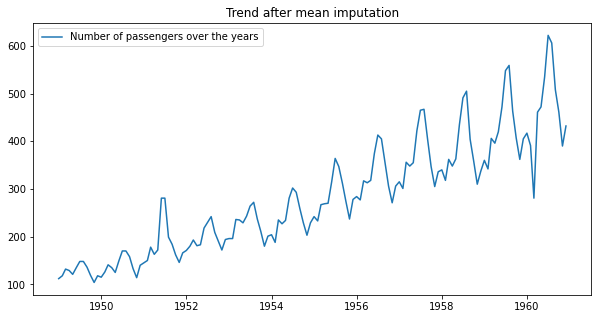

In [15]:
# plotting the time series data of number of passenger across years after mean imputation
plt.figure(figsize=(10,5))
plt.plot(airline_dataframe['mean_imputation'], label = 'Number of passengers over the years')
plt.title('Trend after mean imputation')
plt.legend(loc = 0)
plt.show()

- From above plot we can see that upon imputing the missing values with mean there exists some over and under estimation of missing values treatment as we have imputed one single value for very missing value without taking into consideration of trend. As a result this kind of imputation is not good.

###### Linear Interpolation missing values treatment

In [16]:
# creating new column for linear interpolation
airline_dataframe = airline_dataframe.assign(linear_interpolation = airline_dataframe['Passengers'].interpolate(method = 'linear'))
# checking the head of the dataframe
airline_dataframe.head()

,Passengers,mean_imputation,linear_interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


In [17]:
# checking the missing values in linear interpolated column
airline_dataframe['linear_interpolation'].isnull().sum()

0

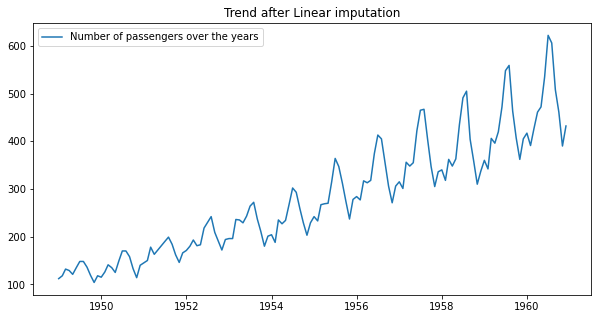

In [18]:
# plotting the data
plt.figure(figsize=(10,5))
plt.plot(airline_dataframe['linear_interpolation'], label = 'Number of passengers over the years')
plt.title('Trend after Linear imputation')
plt.legend(loc = 0)
plt.show()

- From above we can see that upon linear interpolation the tred is maintained. Hence it can be a better imputatio method than plain vanilla mean imputation.

###### Missing values imputation using Last observation carried forward

In [19]:
# creating a column for last observation carried forward
airline_dataframe =  airline_dataframe.assign(last_observation_imputation = airline_dataframe['Passengers'].fillna(method = 'pad'))
# creating a column for next observation filling missing values
airline_dataframe = airline_dataframe.assign(next_observation_imputation = airline_dataframe['Passengers'].fillna(method= 'bfill'))
# checking the head of the dataframe
airline_dataframe.head()

,Passengers,mean_imputation,linear_interpolation,last_observation_imputation,next_observation_imputation
Month,,,,,
1949-01-01,112.0,112.0,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0,121.0,121.0


In [20]:
# checking the missing values based on missing values present in Passengers column
airline_dataframe.loc[airline_dataframe['Passengers'].isnull(), :]

,Passengers,mean_imputation,linear_interpolation,last_observation_imputation,next_observation_imputation
Month,,,,,
1951-06-01,NaN,280.735714,181.0,172.0,199.0
1951-07-01,NaN,280.735714,190.0,172.0,199.0
1954-06-01,NaN,280.735714,268.0,234.0,302.0
1960-03-01,NaN,280.735714,426.0,391.0,461.0


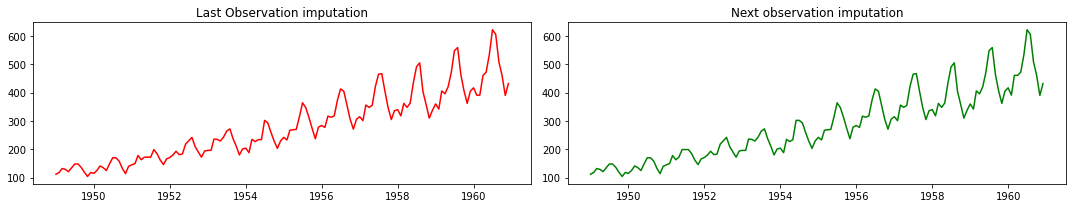

In [21]:
# plotting the plots for back fill and front fill 
plt.figure(figsize= (15,3))
plt.subplot(1,2,1)
plt.plot(airline_dataframe['last_observation_imputation'], 'r')
plt.title('Last Observation imputation')
plt.subplot(1,2,2)
plt.plot(airline_dataframe['next_observation_imputation'], 'g')
plt.title('Next observation imputation')
plt.tight_layout()
plt.show()

###### Missing value imputation using Seasonal + Linear

In [22]:
# creating a new column which corresponds to seasonal and linear imputation
airline_dataframe = airline_dataframe.assign(seasonal_linear_imputation = airline_dataframe['Passengers'].interpolate(method = 'slinear'))
# checking the head of the dataframe
airline_dataframe.head()

,Passengers,mean_imputation,linear_interpolation,last_observation_imputation,next_observation_imputation,seasonal_linear_imputation
Month,,,,,,
1949-01-01,112.0,112.0,112.0,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0,121.0,121.0,121.0


In [23]:
# checking the missing values in the columns
airline_dataframe.isnull().sum()

Passengers                     4
mean_imputation                0
linear_interpolation           0
last_observation_imputation    0
next_observation_imputation    0
seasonal_linear_imputation     0
dtype: int64

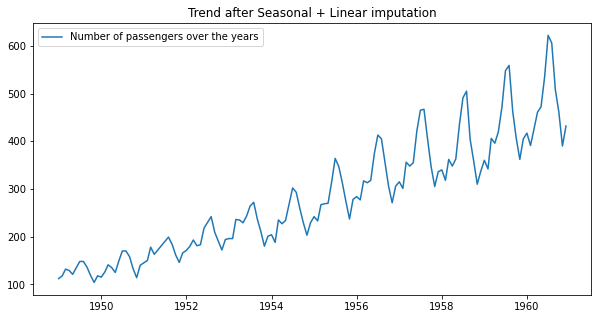

In [24]:
# plotting the time series data after seasonal+linear imputation
plt.figure(figsize=(10,5))
plt.plot(airline_dataframe['seasonal_linear_imputation'], label = 'Number of passengers over the years')
plt.title('Trend after Seasonal + Linear imputation')
plt.legend(loc = 0)
plt.show()

- From above plot we can see that the missing values imputation have been performed upon considering the seasonal and linear effect. Hence it is better imputation method compared to others.

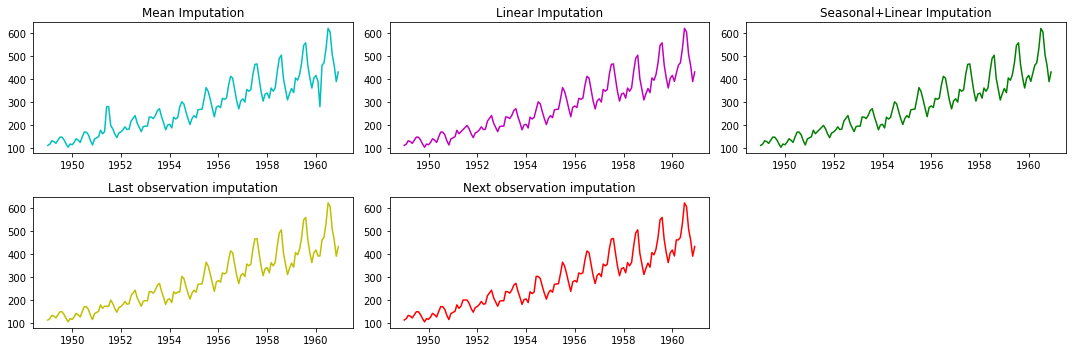

In [25]:
# visualiztion in all together
plt.figure(figsize= (15,5))
plt.subplot(2,3,1)
plt.title('Mean Imputation')
plt.plot(airline_dataframe['mean_imputation'], 'c')
plt.subplot(2,3,2)
plt.title('Linear Imputation')
plt.plot(airline_dataframe['linear_interpolation'], 'm')
plt.subplot(2,3,3)
plt.title('Seasonal+Linear Imputation')
plt.plot(airline_dataframe['seasonal_linear_imputation'], 'g')
plt.subplot(2,3,4)
plt.plot(airline_dataframe['last_observation_imputation'], 'y')
plt.title('Last observation imputation')
plt.subplot(2,3,5)
plt.plot(airline_dataframe['next_observation_imputation'], 'r')
plt.title('Next observation imputation')
plt.tight_layout()
plt.show()

- From all the above plots we come to a conclusion that we go with linear imputation of missing values as it takes into consideration of trend and imputes the missing values with average value which is better than imputing with same last or next observations.

In [26]:
# checking the head of the dataframe
airline_dataframe.head()

,Passengers,mean_imputation,linear_interpolation,last_observation_imputation,next_observation_imputation,seasonal_linear_imputation
Month,,,,,,
1949-01-01,112.0,112.0,112.0,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0,121.0,121.0,121.0


In [27]:
# imputing the missing values in Passenger column with linear_imputation column
airline_dataframe['Passengers'] = airline_dataframe['linear_interpolation']

In [28]:
# checking for the missing values after imputation
airline_dataframe['Passengers'].isnull().sum()

0

### Handling Outliers

In [29]:
# checking for the describe of the columns
airline_dataframe['Passengers'].describe()

count    144.000000
mean     280.333333
std      120.048359
min      104.000000
25%      180.750000
50%      267.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

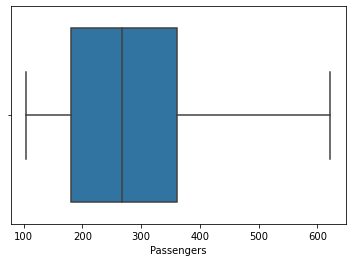

In [30]:
# plotting box and whisker plot in order to check for the presence of outliers
sns.boxplot(airline_dataframe['Passengers'])

- Upon observation of above box plot which has been plotted by considering the length of the whiskers to be 1.5 times the IQR. By default seaborn package or any other visualization package considers 1.5 times IQR only. Upon considering 1.5 times IQR and plotting the box plot we see that there are no observations beyond the whisker lines which is an indication that there doesn't exists any outliers. But the length of the whisker line is an subjective parameter meaning we can alter as the data we have. Let's change it to 1x IQR and plot the boxplot.

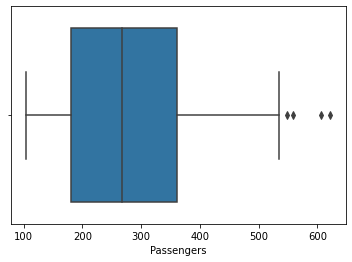

In [31]:
# plotting box plot considering 1xIQR
sns.boxplot(airline_dataframe['Passengers'], whis= 1)

- Upon plotting considering 1 times of IQR we can see that on right side there exists some data points which lie outside the inner fence which are outliers. But before making any final judgement that these are true outliers are not let's analyze the trend in the time series data. From the trend we can see that every day there is an steady increase in number of passengers travelling along that route. Hence these data points which fall outside the inner fence cannot be considered as true outliers. These are just continous increases values. Let's also detect outliers using histogram.

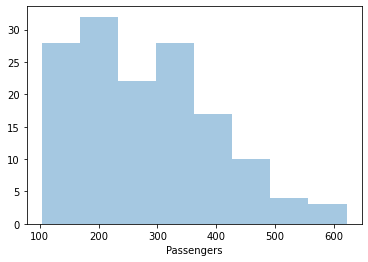

In [32]:
# plotting histogram
sns.distplot(airline_dataframe['Passengers'], kde= False)

- From above histogram we can see that there exists continous bar plots stacked together and as the number of passengers increases there frequency as well decreases and also there doesn't exists any discontinuity in the histogram which is an clear indication that there doesn't exists any outliers. Hence we can say that the data doesnot contain any outliers.

### Time Series Decomposition

- So far we are done with data cleaning and we can proceed forward to forecasting model building. But before that let's take a look at the components present in time series data. We know that the main components in the time series data are: <br>
    - __Baseline__: which is nothing but the the average of the time series. Upon which we will be adding various other components.
    - __Trend__ : Over a long period we can get to know whether there exists increasing or decreasing trend. Also, there could be first increasing and then decreasing or vise-versa. Such instances are called as changing direction.
    - __Seasonality__ : If there exists historic pattern repeatation in data periodically meaning there exists same pattern repeatation over a fixed interval is referred to as having seasonality in the data. Upon having seasonality in data it would be helpful in making accurate and good predictions about the future.
    - __Cyclicity__ : There exists a subtle differnece between seasonality and cyclicity. In cyclicity if there exists some pattern repeatation aperiodically then the data is said to have cyclicity in it. The data may or may not contain cyclicity in it. But upon having considerable long enough data we can identify some cyclicity in it.
    - __Noise__ : The random patterns in the data are referred to as Noise. These pattern will not be helpful in making predictions about the future as we will not be able to understand these random patterns. The model which we built should be robust enought in order to filter out noise in the that as they belong of unwanted part of the data.
    - __Residual__ : Upon extrating trend and seasonality from the data the left out portion of data is referred to as residual. <br><br>
- Upon having understanding about the various compoenents of time series data. Let's also understand what are the mandatory present components in time series data. Those are Baseline and Noise. The other components may or may not exist in the data but Baseline and Noise components exists for sure in what so ever time series data we consider. 
- The main components to time series data are Trend and Seasonality. These components can be extracted indiviually from time series data using different types of modelling. Such process of extracting out the components of time series data is referred to as decomposition.<br>
- There are two methods to decomposition:<br>
    - __Additive Seasonal decomposition__ <br>
    - __Multiplicative Seasonal decomposition__ <br><br>
- In __Additive Decomposition__ there exists linear behaviour meaning the magnitude and frequency or seasonality doesnot change over time. Also, the model which has been built out of these components will have linear additive combination of these times series components. If there exists changing magnitude and frequency of seasonality pattern and considered additional model in such case we can see that there exists some seasonal pattern present in residual as well. Hence when magnitude of seasonal plot doesn't have any direct relation with data values then in such case it is better to plot additional decomposition.
        -> y = Level + Trend + Seasonality + Cyclicity + Noise 
- In __Multiplicative Decomposition__ there exists either increasing or decreasing of magnitude of seasonal pattern with increase in data or decrease in data values meaning there exists a direct proportionality relationship between magnitude of seasonality pattern and data values. In this both magnitude and frequency keeps on changing as per data values. In such scenarios it is better to consider Multiplicative model as the residual will be containing just the random patterns and not any other seasonal affect patterns.
        -> y = Level * Trend * Seasonality * Cyclicity * Noise 
- One thing need to be noted before performing any time series analysis is that the data that we have considered should have equally spaced data points over time.<br><br>
- Let's perform Time Series Decomposition on our data.

In [33]:
# importing necessary libraries for performing time series decomposition
import statsmodels.api as sm

<Figure size 864x864 with 0 Axes>

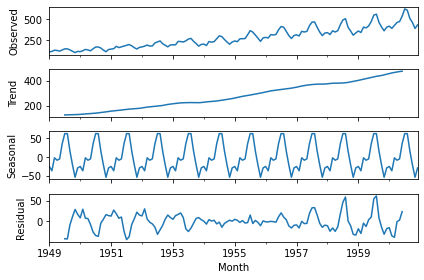

In [34]:
# Performing addtive decomposition of time series data
additive_decomposition = sm.tsa.seasonal_decompose(airline_dataframe['Passengers'], model = 'additive')
# plotting decomposition plot
plt.figure(figsize= (12,12))
additive_decomposition.plot()
plt.show()

- From above we can see that there exists overall increasing trend over the time period.
- In seasonal plot we can see that there exists pattern repeatation. But there exists variation in maginitude being frequency constant as a result we can see that there exists some seasonal pattern repeatation in residuals as well.

<Figure size 864x864 with 0 Axes>

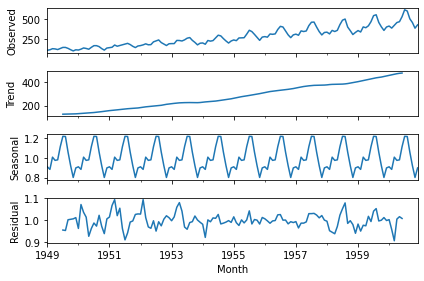

In [35]:
# performing multiplicative seasonal decomposition
multiplicative_decomposition = sm.tsa.seasonal_decompose(airline_dataframe['Passengers'], model = 'multiplicative')
# plotting decomposition model
plt.figure(figsize= (12,12))
multiplicative_decomposition.plot()
plt.show()

- From above we can see that there exists similiar trend as additive seasonal decomposition.
- From seasonal plot we can see that there exists vairation in magnitude with the increase and decrease of data and upon choosing multiplicative seasonal decomposition there doesn't exists any seasonal repeatations in residual plot as well. The residual plot is completely random.

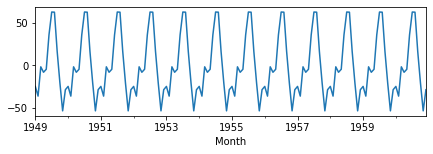

In [36]:
# we can access the indiviual plots of decomposition as well. For example if wanted to access seasonal plot from additive decomposition
plt.figure(figsize= (7,2))
additive_decomposition.seasonal.plot()

- Similarly we can access other data as well:
    - decomposition.seasonal
    - decomposition.resid
    - decomposition.trend
    - decomposition.observed

## Forecasting Model Building

- Let's start building some simplier forecasting models.
    - Naive Forecasting Model
    - Seasonal Naive Forecating Model
    - Simple Average Forecating Model
    - Drift Regression Forecating Model <br><br>
- Before that let's start understanding each of the modelling methods:<br><br>
     - __Naive Forecasting Model__ : In this method we considering the last observation value and carry it forward for making predictions for all future values. Doing so we will not be taking into account of Trend and Seasonality present in data. Though sometimes this kind of approach tunrs out be meaningful example in cases of stock price index being fluctuating randomly and having such random behaviour we will not be making use to that pattern for many forecasting in such cases this Naive methods will give us some meaningful sense prediction of future value. Upon doing so the predictions completely depend on last observation value. If the last observation value turns out to lower value then for future predictions we may be under estimating the predictions. Similarly on the other hand if the last observation value turns out to be on higher side value then for all future predictions we will be making over predictions. Such predictions will have gross difference with actual values. <br><br>
     - __Seasonal Naive Forecating Model__ : In previous modelling technique we haven't considered any Trend and Seasonality of the time series data. In this modelling technique we consider seasonality into account when making predictions for future values. Doing so though we will taking into account of seasonality of last observation we will not be taking into account of Trend of time series data. In making prediction we assume that future value will also same have seasonal magnitude as previous seasonal magnitude. As per seasonality the predictions are made. For example if the seasonality of time series data is 1 year in such case when making prediction for future Janurary we will consider the past Janurary value as its prediction. If seasonality is quarterly then when making predictions about the future the past quarter value need to be considered. This method is completely dependent on last observation value. <br><br>
- The Naive method and Seasonal Naive methods both are affected by the noise component present in data. If there is any change in last observation value the complete future prediction values will be altered.<br><br>
     - __Simple Average Forecating Model__: In this method we will consider the complete average of time series data as predictions for all future values. Doing so we will be making under prediction or over prediction. This method also similar to Naive method doesn't take into consideration of Trend and Seasonality.<br><br>
     - __Drift Forecating Model__: This type of modelling resonates its properties from linear regression by trying to fit a linear line by joining starting and ending point and the extending the line into future for explorating the results for making future predictions. Though this method takes into consideration of Trend but not Seasonality.

In [37]:
# checking again the head of the dataframe
airline_dataframe.head()

,Passengers,mean_imputation,linear_interpolation,last_observation_imputation,next_observation_imputation,seasonal_linear_imputation
Month,,,,,,
1949-01-01,112.0,112.0,112.0,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0,121.0,121.0,121.0


In [38]:
# considering only subset of dataframe
airline_dataframe = airline_dataframe['Passengers']

In [39]:
# Before model building let's split the data into train and test
train_len = 120
train_data = airline_dataframe[0:train_len]
test_data = airline_dataframe[train_len:]

In [40]:
# checking the head of train data
train_data.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: Passengers, dtype: float64

In [41]:
# checking the head of test data
test_data.head()

Month
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
Name: Passengers, dtype: float64

In [42]:
# checking the shapes of train and test
train_data.shape, test_data.shape

((120,), (24,))

### Building Naive Forecast Model

In [43]:
# considering dataframe of test data
y_naive = pd.DataFrame(test_data)
# adding column for forecasts made using naive method
y_naive['naive_forecasts'] = train_data[-1]
# checking the head of dataframe
y_naive.head()

,Passengers,naive_forecasts
Month,,
1959-01-01,360.0,337.0
1959-02-01,342.0,337.0
1959-03-01,406.0,337.0
1959-04-01,396.0,337.0
1959-05-01,420.0,337.0


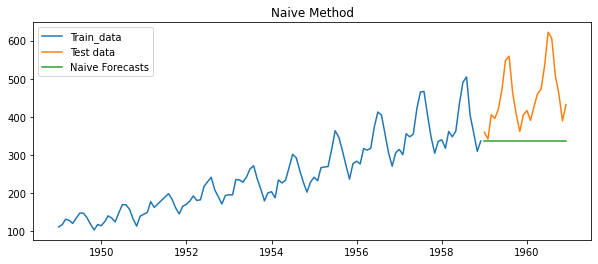

In [44]:
# plotting the train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train_data')
plt.plot(test_data, label =  'Test data')
plt.plot(y_naive['naive_forecasts'], label = 'Naive Forecasts')
plt.title('Naive Method')
plt.legend(loc = 0)
plt.show()

### Simple Average Forecast Modelling

In [45]:
# creating a dataframe for forecasting using simple avg method
y_avg = pd.DataFrame(test_data)
# adding column for avg forecasts
y_avg['avg_forecasts'] = np.average(train_data)
# checking the head of the dataframe
y_avg.head()

,Passengers,avg_forecasts
Month,,
1959-01-01,360.0,245.891667
1959-02-01,342.0,245.891667
1959-03-01,406.0,245.891667
1959-04-01,396.0,245.891667
1959-05-01,420.0,245.891667


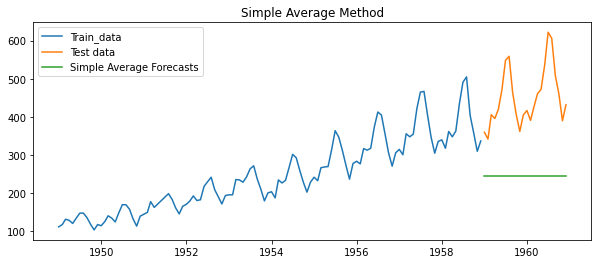

In [46]:
# plotting the train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train_data')
plt.plot(test_data, label =  'Test data')
plt.plot(y_avg['avg_forecasts'], label = 'Simple Average Forecasts')
plt.title('Simple Average Method')
plt.legend(loc = 0)
plt.show()

- Hence both the Naive method and Simple average method didn't capture any trend and Seasonality present in the data.

## Error Estimation

- Now let's move forward to estimate the forecasts which we have made by measuring the error associated with the forecasts. Doing so we will get to know how well are the forecasts made and also these Error metrics can be used for comparison of forecasting models. Obviously lower the error the better the forecasts. Let's understand some of the error measuring metrics: <br><br>
    - __MFE__ : Mean Frequency Error, also called as frequency bias. It is generally a naive measure which just calculates the difference between actual values and predicted values or forecasted values and then taking the sum of average of those differences. Using this metric we will get to know on a average and on a whole whether the predictions are over estimated or under estimated. Upon having positive value of MFE it means that our predicted values are lower than actual values. Similarly having negative value it indicates that our predictions are over estimated. But there is small nuance in this metric, since we are considering sum of difference between actual and predicted values the positives and negatives will cancel with each other as a result we will not be knowing about the deviation between actual and predicted values. This drives us to consider MAE metric.<br><br>
    - __MAE__ : Mean Absolute Error, rather than considering direct sum of differences between actual and predicted values we consider absolute values of the error terms as a result we will get to know on a average what is the deviation between actual and predicted values. But at the same time this value inference completely depends on scale of the actual values meaning if the scale of the actual values is single digit and in such case our MAE turns out to be 1.5 which is an indication that our predictions are poor. Similarly if the scale of actual values are in thousands and in such case MAE turns out to be 1.5 in that situation our predictions turns to be good. Hence estimation of MAE would difficult. Hence we now consider MAPE. <br><br>
    - __MAPE__ : Mean Absolute Percentage Error, in order to avoid the shortcomings of MAE we now consider percentages of absolute value in relation with actual values which will be better in understanding as well. Upon considering MAPE we no need consider the scale of actual values. There is one more advantage of considering MAPE metric, since it a percentage value upon subtracting from 100 we will get to know the accuracy of the forecasting model as well.<br><br>
    - __MSE__ : Mean Square Error, MSE and MAE are based on same ideology. In order to avoid cancellation of positives and negatives when considering the sum of error terms we consider these MAE and MSE. In this case we just consider the square of the error terms and take their average. MSE would be generally used when wanted to perform parameter optimization as considering MSE as error term will help us to find optimum value of model parameters by differentiating the error function. Whereas on the other considering MAE as error function it will not help in finding the optimum model parameters as the error function is not differentionable at its minima point. But there is small nuance in considering MSE, as we are considering square of error terms the units of MSE would be different from actual values. Hence in order to overcome this we consider RMSE fo simplier estimation. <br><br>
    - __RMSE__ : Root Mean Square Error, in this we just consider the root of MSE.<br><br>
   
- For model evaluation we will consider MAP.

###### Calculating RMSE and MAPE for naive model predictions

In [47]:
# computing RMSE
rmse_naive = np.round(np.sqrt(mean_squared_error(test_data, y_naive['naive_forecasts'])),2)
rmse_naive

137.51

In [48]:
# computing MAPE
mape_naive = np.round(np.mean((np.abs(test_data-y_naive['naive_forecasts'])/test_data)*100),2)
mape_naive

23.63

In [49]:
# creating a dataframe which stores all these values
error_dataframe = pd.DataFrame(data= {'Method': ['Naive method'], 'RMSE': rmse_naive, 'MAPE': mape_naive})
error_dataframe.head()

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


###### Calculating error metrics for simple average forecasting method

In [50]:
# computing rmse
rmse_simple_avg = np.round(np.sqrt(mean_squared_error(test_data, y_avg['avg_forecasts'])),2)
rmse_simple_avg

219.69

In [51]:
# computing mape
mape_simple_avg = np.round(np.mean((np.abs(test_data-y_avg['avg_forecasts'])/test_data)*100),2)
mape_simple_avg

44.28

In [52]:
# storing the values into the dataframe
temp_dataframe = pd.DataFrame(data= {'Method': ['Simple average method'], 'RMSE': rmse_simple_avg, 'MAPE':mape_simple_avg})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
# checking the head of the dataframe
error_dataframe.head()

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28


### Cross Validation Methods in Time Series Forecasting

- Cross validation techniques used in classical machine learning algorithms is not the same in Times series cross validation. This is because the fact that in time series the order of the historic data is takne into consideration. Before proceeding to understanding the different cross validation methods in time series we need to keep in mind one principal about the train and test split of data in time series forecasting. Always the test data needs to be consdiered ahead of time when compared to train data. Since forecasting is used to predict data points of future we should perform any random division of data into train and test as it will affect the order and test data points will then contain some historic data points as well. Hence it is always recommended to consider test data points always ahead of train data points. There are two methods of cross validation techniques used in Time series validation with some subtle difference those as follows:<br><br>
     - __One Step Cross validation__ : In this case we consider test data point as just one step ahead of train data points one after the other. Because in order to predict any future data point we need to have previous data points. We cosider one after other data point just after train data and make predictions then move forward ahead. If the horizon of the forecasting is more than 1 day or 1 month meaning if planning to perform forecasting for long period in such case we will move on to other method of cross validation which is Multi Steps cross validation.<br><br>
     - __Multi Steps Cross validation__ : In this case rather considering test data point just ahead of train data we skip few data points and then consider test data points one after other so as to make forecasts into far future.

### Simple Moving Average Forecasting Modeling

- So far we have just considering simple forecasting models like Naive and simple average method. In simple average method we have considered average of all the data points. Rather than considering average of all the data points we prefer to consider to average of last few observations considering that last few observations will have strong impact in making predictions about future rather than first observations. This drives to the new forecasting modeling technique : Simple Moving Average Forecasting.

__Process in Simple Moving Average Forecasting Method__:
- We move forward in simple moving average forecasting method assuming the recent last observations have great impact in making predictions for the near future. So, in this method we defing something called moving average window which might be 3 months, 6 months or 12 months or any based on the seasonality present in the time series data. Upon considering moving area window say to be 12 months, we compute rolling average at every data point provided there exists 12 month trailing data at that data point. The prediction at a data point will be the average of 12 months data points as we have considering moving average window to be 12 months. As a result we will be able to capture the trend present in time series data and as per the window size we will be also able to capture the seasonality present within the year. Since here we have considered 12 months as moving average window we will not be able to capture any seasonal affect present within 12 months. In order to capture we will consider lower moving average window size. The choice of moving average window size is subjective meaning upon considering lower window size we will be able to capture seasonality and trend but at the cost of allowing more noise entering into moving average window. Similarly upon considering larger moving average window we may capture trend but not the seasonal affect within the year  but we will be having lower noise enetering into our window. Upon having more noise entering into our window our predictions might be thrown off. The noise is nothing but the random patterns present in the data. Hence there is a tadeoff between capturing trend and seasonality and allowing noise into window.
- If data contains noise component which are unsystematic fluctuations present in the data or just some random fluctuations are referred to as noise. In such case upon considering lower window size we will be mostly capturing noise rather than seasonality of the trend present in the data. If there doesn't exists much noise in such case considering lower window size will be able to capture the trend and seasonality better.
- One important cavet need to be remembered here is for all the test data points the predictions will be equal to prediction made for the first test point as per the moving average window. Because for the test data point which is present just ahead of train data will be available with the train data to be able to calculate the moving average. But for the other test data points we will not be available with the train data points hence we extrapolate the same prediction value to all future test data points.

###### making forecasts using simple moving average method

In [53]:
# converting the airline series into dataframe
airline_dataframe = pd.DataFrame(airline_dataframe)
# checking the head now
airline_dataframe.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [54]:
# defining dataframe which includes tha forecasts made by simple moving average
y_sma = airline_dataframe.copy()
# defining moving average window
ma_window = 12
# adding column which represents the predictions made
y_sma['sma_forecasts'] = y_sma['Passengers'].rolling(window = ma_window).mean()
# need to make small changes as for the test data points no training data will be available to compute moving average
y_sma['sma_forecasts'][train_len:] = y_sma['sma_forecasts'][train_len-1]
# checking the head of the dataframe
y_sma.head()

,Passengers,sma_forecasts
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN


- The reason why we are seeing some of the NAN values for the first few months of the training data is because for those data points there doesn't exists enought trailing data points to compute moving average. Hence we see NAN values for the first 12 months. From 13 month we will be able to see moving average as at 13 month we will be avaiable with trailing 12 months.
- The reason why we have considered copy of the complete dataframe is to see how moving averages have been computed for the training data points as well along with test data point predictions.

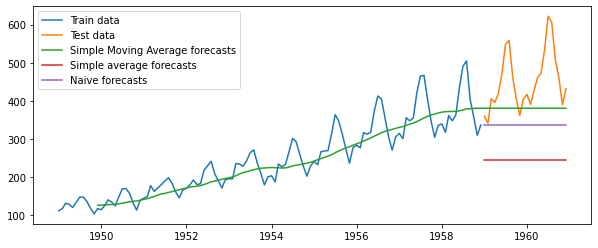

In [55]:
# Plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_sma['sma_forecasts'], label = 'Simple Moving Average forecasts')
plt.plot(y_avg['avg_forecasts'], label = 'Simple average forecasts')
plt.plot(y_naive['naive_forecasts'], label = 'Naive forecasts')
plt.legend(loc= 0)
plt.show()

- From above plot we can see how well the simple moving average is able to make predictions on the test data points better than simple average and naive methods which are really naive methods.
- Also, from above plot we can see that the moving average line has become completely smoother as we have considering 12 month moving average window. It has deseasonalized the complete seasonal affect present within 12 months at every data point thus it was not able to capture the seasonal affect present within 12 months. Upon considering lower moving average window we will get less smoother curve and be able to capture seasonal affect present within 12 months.<br><br>
- Let's consider other window size and see that variation in rolling or moving averages and how the forecasts are made on test data.

###### Considering moving average window to be equal to 6

In [56]:
# adding a new column into y_sma dataframe corresponding to predictions made considering moving average to be 6
y_sma['sma_6'] = y_sma['Passengers'].rolling(window  =6).mean()
# making modification for the test data points
y_sma['sma_6'][train_len:] = y_sma['sma_6'][train_len-1]
# checking the head of the dataframe
y_sma.head()

,Passengers,sma_forecasts,sma_6
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


In [57]:
# computing the mean of the test data
test_data.mean()

452.5416666666667

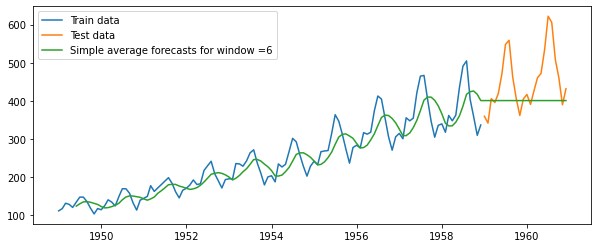

In [58]:
# Plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_sma['sma_6'], label = 'Simple average forecasts for window =6')
plt.legend(loc= 0)
plt.show()

- From above plot we can see that upon considering lower window size the curve has become less smoother and started to capture some seasonal affect within 12 months when compared to before window size = 12. But we can see that there exists some lag between the peaks and turfs when compared with training time series data. This lag is because our considered 6 months window size. But the predictions made on the test data are approaching closer to mean.

###### Considering moving average window to be equal to 3

In [59]:
# adding a new column into y_sma dataframe corresponding to predictions made considering moving average to be 3
y_sma['sma_3'] = y_sma['Passengers'].rolling(window  =3).mean()
# making modification for the test data points
y_sma['sma_3'][train_len:] = y_sma['sma_3'][train_len-1]
# checking the head of the dataframe
y_sma.head()

,Passengers,sma_forecasts,sma_6,sma_3
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,120.666667
1949-04-01,129.0,NaN,NaN,126.333333
1949-05-01,121.0,NaN,NaN,127.333333


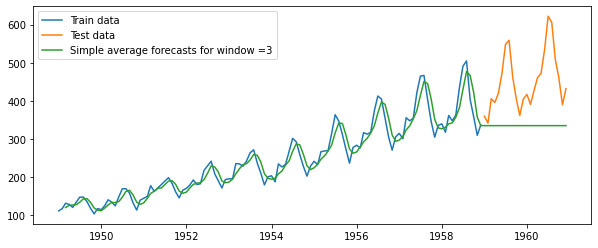

In [60]:
# plotting train , test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_sma['sma_3'], label = 'Simple average forecasts for window =3')
plt.legend(loc= 0)
plt.show()

- From above plot we can see that the moving averages are able to capture the trend well but due to the considered window size the noise component will get increased as a result in the predictions might get thrown away. Since it is able to capture the trend well the lag has reduced but the predictions on the test test are deviated.

In [61]:
# computing the error metrics
rmse_sma = round(np.sqrt(mean_squared_error(test_data, y_sma['sma_forecasts'][train_len:])),2)
mape_sma = round(np.mean((np.abs(test_data - y_sma['sma_forecasts'][train_len:])/test_data)*100),2)
# defining temp dataframe to add all results into single dataframe
temp_dataframe = pd.DataFrame({'Method': ['Simple Moving Average'], 'RMSE': [rmse_sma], 'MAPE': mape_sma})
# concatenating with error dataframe
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis =0)
# checking the head of the error dataframe
error_dataframe.head()

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54


- Again from above error metric results we can see that same which we have already seen in above graph. We can see that RMSE and MAPE values for simple moving average method is much lower than other methods.

__Some of the shortcomings in simple moving average method are:__
- when making predcition about a future data point or forecast we are considering average of all the data points considered in window. As a result when making forecast we are giving equal importance to all the data points captured in the window. But intutively the lastest data points will have greater impact in making forecast about the near furure points rather than initial observation of the window. The near future data points will tend to have more sort of the latest data points pattern rather then far data points. Hence we assign some weights to the observations in such a way that the latest observations gets more importance and initial observations get less importance. This drives us to new type of forecasting modeling which is weighted moving average.
- In simple moving average though we are able to capture the seasonality in the train data but still there exists some lag in predictions when made on train data.
- For the test data still we are not able to capture the seasonality.

### Simple Exponetional Smoothing Forecasting Method

- Rather than assigning equal weights or importance to each of the observations which are captured in window for making forecast about the near future data points in simple moving average method. We start assigning weights to the observations considering the assumption that closest observations will have greater impact in determing the forecast for the future data points than initial observations. In simple exponetial smoothing we assign weights in exponetial decaying order such that the closest observation will get higher weight and farthest observations will get lowest weight. Simple the weights assigned to the observations follow a exponetial decay order it is said to be exponetial smoothing technique. Using the class of exponetial smoothing techniques we will be capturing different components present in time series data. We know that the major components in time series data are Level, Trend and Seasonality. The reason why it is called to be simple because we capturing only one of the component in time series which is Level. Hence it is said to be simple and exponetial smoothing technique. Level is nothing but the average.

- When assigning weights to each of the observations we consider a parameter called Level Smoothing Parameter (alpha). The range of alpha lies between 0 and 1.
- Considering low alpha value indicates that we are assigning lower weights to the latest data point. Similarly considering higher value of alpha indicates that we are assignig higher weight to the recent observation. Upon considering value of alpha= 1 then our simple expontial model becomes naive method where in we consider the last observation and carry it forward to all the test data points. Upon considering lower value of alpha our forecasts will be closer to the initial observations value.
- Having time series data with trend and seasonality in it in such case upon increasing the alpha value in simple exponetial smoothing method we will be better able to capture the trend and level across each pattern repeatation period. Also, the lag decreases between actual values and forecasted values when compared to forecasts made considering lower alpha value.
- On the other hand having time series data with noise in it meaning having unsystematic fluctuations in such case upon increasing the alpha value our forecasts will be widely deviated from actual values.
- Hence this level of smoothing alpha needs to be tuned in order to have our forecasts closer to actual values.

###### making forecasts using simple exponetial smoothing method

In [62]:
# loading few packages to perform the activity
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [63]:
# defining the mdoel object
model_ses = SimpleExpSmoothing(train_data)
# fitting the model here we define alpha value
model_ses_fit = model_ses.fit(smoothing_level = 0.2, optimized =  False)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


- In model_fit we pass parameters like smoothing_level which is nothing but the alpha value. If wanted to not to optimize and result the best alpha we set optimized = False

In [64]:
# making forecasts using the model
y_ses = pd.DataFrame(test_data)
# adding column to represent the forecasts
y_ses['ses_forecasts'] = model_ses_fit.forecast(24)
# checking the head of the dataframe
y_ses.head()

,Passengers,ses_forecasts
Month,,
1959-01-01,360.0,374.897327
1959-02-01,342.0,374.897327
1959-03-01,406.0,374.897327
1959-04-01,396.0,374.897327
1959-05-01,420.0,374.897327


- When making forecasts we pass the number of months for which we want to forecast above train data. Since our train data corresponds to 24 months hence we pass 24 months of forecasts.

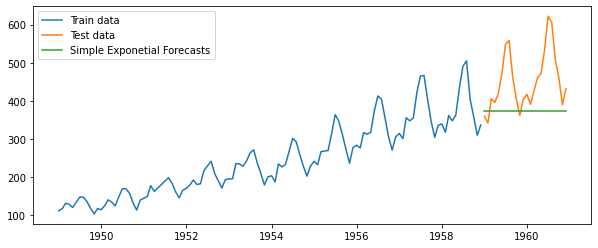

In [65]:
# plot train, test , forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_ses['ses_forecasts'], label = 'Simple Exponetial Forecasts')
plt.legend(loc= 0)
plt.show()

- From above we can see that our forecasts are closer to the level of test data points which is the average of test data points. Since in simple exponetial smoothing only the level is captured we can see a start line.

In [66]:
# computing the error metrics
rmse_ses = round(np.sqrt(mean_squared_error(test_data, y_ses['ses_forecasts'])),2)
mape_ses = round(np.mean((np.abs(test_data - y_ses['ses_forecasts'])/test_data)*100),2)
# defining temp dataframe to add all results into single dataframe
temp_dataframe = pd.DataFrame({'Method': ['Simple Exponential Smoothing'], 'RMSE': [rmse_ses], 'MAPE': mape_ses})
# concatenating with error dataframe
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis =0)
# checking the head of the error dataframe
error_dataframe.head()

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49


- From above dataframe we can see that our simple exponetial smoothing has resulted us higher error metrics values slightly when compared to simple moving average.

In [290]:
# increasing the alpha (level smoothing parameter)
# defining the mdoel object
model_ses_1 = SimpleExpSmoothing(train_data)
# fitting the model here we define alpha value
model_ses_fit_1 = model_ses.fit(smoothing_level = 0.3, optimized =  False)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [291]:
# making forecasts using new model
y_ses['new_forecasts'] = model_ses_fit_1.forecast(24)
# checking the head after forecast
y_ses.head()

,Passengers,ses_forecasts,new_forecasts
Month,,,
1959-01-01,360.0,374.897327,366.056553
1959-02-01,342.0,374.897327,366.056553
1959-03-01,406.0,374.897327,366.056553
1959-04-01,396.0,374.897327,366.056553
1959-05-01,420.0,374.897327,366.056553


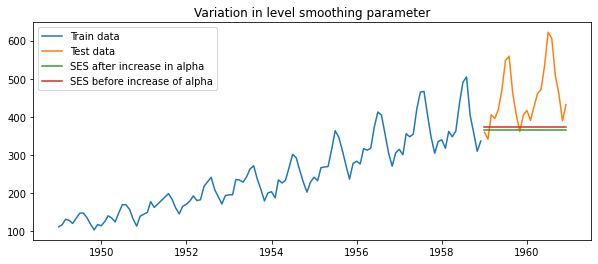

In [292]:
# plotting the forecasts after increasing the alpha value
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_ses['new_forecasts'], label = 'SES after increase in alpha')
plt.plot(y_ses['ses_forecasts'], label = 'SES before increase of alpha')
plt.legend(loc = 0)
plt.title('Variation in level smoothing parameter')
plt.show()

- From above we can see that upon increaseing level smoothing parameter the level parameter has moved closer to the level value of the training data. Basically upon increase in smoothing level parameter the level component moves closer to the training data i.e. the lag decreases.
- But if the data contains more noise component which are nothing but unsystematic fluctuations in the data then in such case upon increase in alpha value more weightage would be given to the noise componentas a result the predictions would be deviated. Hence in such case a optimal value of alpha needs to be selected.

### Holt's Exponetial Smoothing Method

- Let's move to another exponetial smoothing technique which is Holt's exponetial smoothing technique. Holt's exponetial smoothing techique takes into consideration of both Level and Trend. Hence the prediction for a furture data point will be equal to (level+trend) associated with the just previous data point. Since we are taking into consideration of trend we need to consider trend smoothing parameter as well along with level smoothing parameter.

In [67]:
# importing necessary libraries from statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [68]:
# defining the model object
model_hes = ExponentialSmoothing(np.array(train_data),trend = 'additive', seasonal_periods= 12, seasonal =  False)
# fitting the data on top of the model object
model_hes_fit = model_hes.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized = False)

- When defining the model object few things need to be taken into consideration:
     - The train data need to provided in a array
     - As per our time series decomposition we see a linear increasing Trend hence we need to pass under trend parameter to be additive. If the there exists any exponential or any other trend patternd then we need to provide multiplicate trend.
     - Although Holt's smoothing method doesnot capture the seasonality present in the data we can provide the seasonal_period whatsoever as per the data.
     - Again since holt's smoothing doesn't capture seasonality present in data we may or may define seasonal =  False.

In [69]:
# defining one temp model of holts setting optimized to True
model_hes_temp = ExponentialSmoothing(np.array(train_data),trend = 'additive', seasonal_periods= 12, seasonal =  False)
# fitting the data on top of the model object
model_hes_fit_temp = model_hes_temp.fit(optimized = True)

In [70]:
# checking params of the temp model which has been fit using optimized = True 
model_hes_fit_temp.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 110.11011087336598,
 'initial_slope': 1.8907677811641423,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
# checking the predictions made by optimized model
y_hes_temp = pd.DataFrame(test_data)
# adding column to represent the predictions made
y_hes_temp['hes_temp_forecasts'] = model_hes_fit_temp.forecast(24)
# checking the head of the dataframe
y_hes_temp.head()

,Passengers,hes_temp_forecasts
Month,,
1959-01-01,360.0,338.890768
1959-02-01,342.0,340.781536
1959-03-01,406.0,342.672303
1959-04-01,396.0,344.563071
1959-05-01,420.0,346.453839


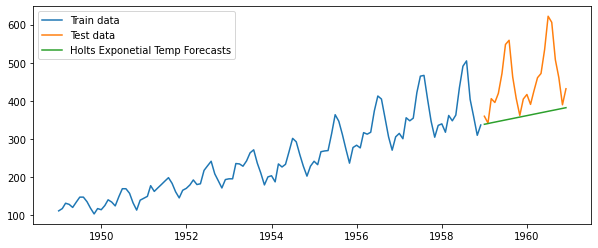

In [72]:
# plotting train, test and predictions
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_hes_temp['hes_temp_forecasts'], label = 'Holts Exponetial Temp Forecasts')
plt.legend(loc= 0)
plt.show()

In [73]:
# prtining the parameters
model_hes_fit.params

{'smoothing_level': 0.2,
 'smoothing_slope': 0.01,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
# making predictions using holt's smoothing forecasting model
y_hes = pd.DataFrame(test_data)
# adding column into dataframe which represents the forecasts
y_hes['hes_forecasts'] = model_hes_fit.forecast(24)
# checking the head of the dataframe
y_hes.head()

,Passengers,hes_forecasts
Month,,
1959-01-01,360.0,393.060661
1959-02-01,342.0,396.446928
1959-03-01,406.0,399.833196
1959-04-01,396.0,403.219463
1959-05-01,420.0,406.605731


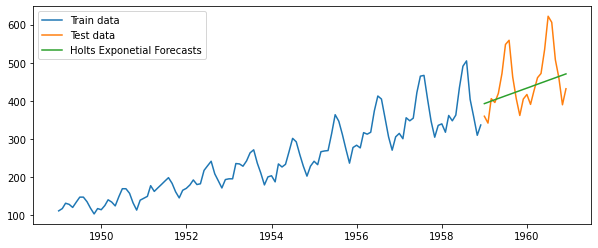

In [75]:
# plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_hes['hes_forecasts'], label = 'Holts Exponetial Forecasts')
plt.legend(loc= 0)
plt.show()

- From above plot we can see that our predictions on future data points is been able to capture the level and trend in the data though we are not able to capture seasonality present in data. The reason why we have considered low value of trend smoothing parameter is that we want to capture the overall trend which is having year after year rather than trend increment month after month. Upon considering larger value of trend smoothing value we will be giving more weights to the difference in levels between most recent observations as a result the slope line will be affected.

In [76]:
# computing the error metrics
rmse_hes = round(np.sqrt(mean_squared_error(test_data, y_hes['hes_forecasts'])),2)
mape_hes = round(np.mean((np.abs(test_data - y_hes['hes_forecasts'])/test_data)*100),2)
# defining temp dataframe to add all results into single dataframe
temp_dataframe = pd.DataFrame({'Method': ['Holts Exponential Smoothing'], 'RMSE': [rmse_hes], 'MAPE': mape_hes})
# concatenating with error dataframe
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis =0)
# checking the head of the error dataframe
error_dataframe.head()

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11


- From above error metrics as well we can see that there has been great decrease in error values when compared to other forecasting methods.

- Let's move further in the class of exponential smoothing techniques and see how all three components level, trend and seasonality is captured. This drives us to the last technique of exponential smoothing which is able to capture all the three components which are Trend, Level and Seasonality.

### Holt's Winter Smoothing Method

##### Holt's Winter additive smoothing method

In [77]:
# defining the model object
hwa_model = ExponentialSmoothing(np.array(train_data), trend = 'additive', seasonal_periods= 12, seasonal= 'add')
# fitting the model using the optimized parameters
hwa_model_fit = hwa_model.fit(optimized = True)
# checking the model parameters associated with the model
hwa_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.26315789314098276,
 'smoothing_slope': 0.051629645024921914,
 'smoothing_seasonal': 0.7368421036672985,
 'damping_slope': nan,
 'initial_level': 211.5509857554829,
 'initial_slope': 1.7392015465813395,
 'initial_seasons': array([-100.18118104,  -94.20464473,  -80.29175401,  -83.41758391,
         -91.45908167,  -77.45094418,  -64.48324484,  -64.57340828,
         -76.66644581,  -93.73584652, -108.67611385,  -94.50947874]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

- Since we have performed additive holt's winter method we see that there exists some additive coefficients which either get subtracted or added to seasonal mean to get to the actual data point.
- Initial level refers to L0
- Initial trend refers to B0
- Initial seasons refers to those additive coefficients for past 12 months since the seasonal period is 12

In [78]:
# making predictions
# defining the dataframe
y_hwa = pd.DataFrame(test_data)
# adding column to represent the forecasts made
y_hwa['hwa_forecasts'] = hwa_model_fit.forecast(24)
# checking the head of the dataframe
y_hwa.head()

,Passengers,hwa_forecasts
Month,,
1959-01-01,360.0,354.124649
1959-02-01,342.0,338.193990
1959-03-01,406.0,389.151127
1959-04-01,396.0,381.953609
1959-05-01,420.0,399.851125


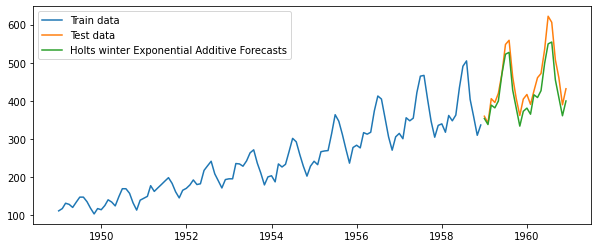

In [79]:
# plottting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_hwa['hwa_forecasts'], label = 'Holts winter Exponential Additive Forecasts')
plt.legend(loc= 0)
plt.show()

- From above plot we can now see that we are able to capture the seasonality present in the train data as well. Which helps in better forecast of future data points. Though there exists some gap in peaks between actual test values and forecasted values which can be reduced by using multiplicative method. Let's perform Holts winter multiplicative smoothing method.

In [80]:
# checking the error metrics
rmse_hwa = round(np.sqrt(mean_squared_error(test_data, y_hwa['hwa_forecasts'])),2)
mape_hwa = round(np.mean((np.abs(test_data - y_hwa['hwa_forecasts'])/test_data)*100),2)
# defining temp dataframe to add all results into single dataframe
temp_dataframe = pd.DataFrame({'Method': ['Holts Winter Exponential Additive Smoothing'], 'RMSE': [rmse_hwa], 'MAPE': [mape_hwa]})
# concatenating with error dataframe
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis =0)
# checking the head of the error dataframe
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53


- From above dataframe we can see that holt's winter additive method has lowest metrics among all as we were able to better capture the level,trend and seasonality.

### Holt's winter Multplicative smoothing method

In [81]:
# defining the model object
hwm_model = ExponentialSmoothing(np.array(train_data), trend = 'additive', seasonal_periods= 12, seasonal= 'mul')
# fitting the model
hwm_model_fit = hwm_model.fit(optimized = True)
# checking the optimized parameters which have been resulted by reducing the sum of square errors
hwm_model_fit.params

{'smoothing_level': 0.38484064840698556,
 'smoothing_slope': 0.035386453247783,
 'smoothing_seasonal': 0.6151593186319729,
 'damping_slope': nan,
 'initial_level': 212.39830870038878,
 'initial_slope': 1.1057967107993691,
 'initial_seasons': array([0.51755725, 0.54595018, 0.60261532, 0.56966257, 0.52017629,
        0.5722879 , 0.62749981, 0.62520353, 0.56963344, 0.49468435,
        0.43937027, 0.51362925]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
# defining dataframe to make predictions
y_hwm = pd.DataFrame(test_data)
# adding column to represent the forecasts
y_hwm['hwm_forecasts'] = hwm_model_fit.forecast(24)
# checking the head of the model
y_hwm.head()

,Passengers,hwm_forecasts
Month,,
1959-01-01,360.0,350.306407
1959-02-01,342.0,333.066574
1959-03-01,406.0,387.343725
1959-04-01,396.0,380.037743
1959-05-01,420.0,398.138810


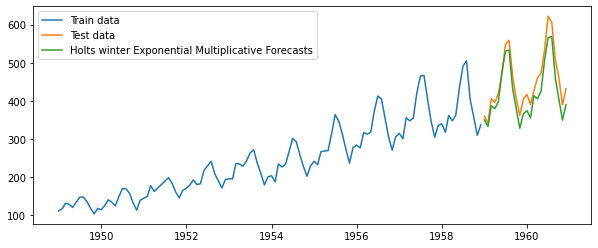

In [83]:
# plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train data')
plt.plot(test_data, label = 'Test data')
plt.plot(y_hwm['hwm_forecasts'], label = 'Holts winter Exponential Multiplicative Forecasts')
plt.legend(loc= 0)
plt.show()

- From above we can see that gap between the peaks has been reduced much.

In [84]:
# checking the error metrics
rmse_hwm = round(np.sqrt(mean_squared_error(test_data, y_hwm['hwm_forecasts'])),2)
mape_hwm = round(np.mean((np.abs(test_data - y_hwm['hwm_forecasts'])/test_data)*100),2)
# defining temp dataframe to add all results into single dataframe
temp_dataframe = pd.DataFrame({'Method': ['Holts Winter Exponential Multiplicative Smoothing'], 'RMSE': [rmse_hwm], 'MAPE': [mape_hwm]})
# concatenating with error dataframe
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis =0)
# checking the head of the error dataframe
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91


- From above dataframe we can see that RMSE value has been slightly decreased when compared to RMSE additive model but the MAPE value has been slightly increased. This is because MAP takes into consideration of absolute errors whereas RMSE takes into consideration of RMSE errors. Hence RMSE imposes higher penality on more deviated forecasts from actual observations whereas the penality imposed on 5 observations deviated 2 units each is equal to the 1 obeservation deviated by 10 units both are same in MAPE as we consider the absolute error.
- On a broad level both Holt's windter additive smoothing modela and Holt's winter multiplicative model performs equally good. Both the models have achieved to get single digit values of MAPE and good amount of lower value of RMSE.
- It is just we need to know when to apply additive model and multiplicative model. Generally when the magnitude of the seasonality doesn't change with time in such case we will prefer additive model. Whereas if the magnitude of seasonal patterns changes with time either either or decrease then we prefer multiplicative model.
- Simply to say if the seasonal patterns are not a function of level or the difference between peak and turf remain same over the time in such case we prefer additive model. On the other hand if the seasonal pattern is a function of level or the difference between peak and turf keeps changes with time then we prefer multiplicative method.

## Auto Regressive Models

- In Auto Regressive Models we will try to fit a Regression line on the time series data. In order to do so we must be still following the rules of Regression like the variation in data should be fixed over time so that the results obtained from regression can be extrapolated for the future data points using auto regressive forecasting methods. But in general time series data will have certain time series components like Trend, Seasonality and Cyclicity as a result there exists variation in magnitude over time due to Trend. Having such properties we will not be able to model regression on to the time series data. Having such components in time series data it is said to be non sationary time series. We can apply regression on to time series data which is stationary meaning having constant mean, variance, covariance. Having these statistical properties constant over time it would be simpler to build auto regressive model using which forecasts can be made simplier.
- Visually we can identify whether the given time series is stationary or not. But we may not be sure. In order to be sure we need to perform some formal test which are based on unit test.
- Unit Root tests are basically which can determine the time series based upon its Trend.
- In order to check whether the given time series is stationary or not through statistical tests we have two common unit root tests which are : KPSS and ADF test
- These unit root tests are based on Hypothesis Testing Framework.

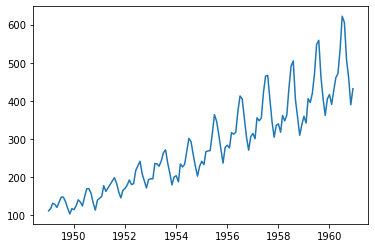

In [85]:
# checking whether the given time series is stationary or not through visual analysis
plt.plot(airline_dataframe['Passengers'])
plt.show()

- From above we can see that there has been gradual increase in Mean
- Also, the fluctuations present in data are changing over time as a result there doesn't exists constant variance
- There exists some Trend, seasonality present in data
- The covariance for a fixed lag is not constant
- Since all the properties of stationarity are being violated the given time series can be considered as Non-Stationary. But let's further make our conlusion strong by performing statiscal tests.

In [86]:
# performing ADF (Augumented Dickey Fuller) test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(airline_dataframe['Passengers'])
# checking the results of adf_test
adf_test

(0.8946087940823904,
 0.9930195647605924,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 993.7736365973918)

- As per ADF test the formulation of Hypothesis as follows:
    - Ho: The time series is not Stationary
    - H1: The time series is stationary
- If p-value < alpha then we reject null hypothesis in favour of alternate hypothesis
- If p-value > alpha then we fail to reject null hypothesis as we donot have enough statistical evidences in order to prove alternate hypothesis

- Some certain values which need to be considered for making decision about stationarity of time series
    - First value in adf_test result tuple corresponds to test statistic
    - Second value corresponds to p value
    - The dictionary within results corresponds to critical values at certain level of significances.
- For our analysis we will be consider the above mentioned values for making decision

In [87]:
# checking the p values
adf_test[1]

0.9930195647605924

- Since the p value turns to be greater than alpha, we fail to reject null hypothesis. Hence we support null hypothesis saying that the given time series is not stationary.

In [88]:
# performing KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(airline_dataframe['Passengers'])
kpss_test

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.0520501504573108,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- As per KPSS test, the null and alternate hypothesis as follows:
    - Ho: The time series is Stationary
    - H1: The time series is not Stationary

In [89]:
# checking the p values resulted from test
kpss_test[1]

0.01

- From above p value we can see that p-value is less than alpha hence we reject Null hypothesis in support of alternative hypothesis. Hence it means that our time series is not stationary.

- Hence from above tests we conclude that out time series data is non stationary. But as mentioned earlier in order to perform auto regressive forecasting our time series needs to be sationary and in order to to be stationary we need to removed the time series components present in it. The time series data shouldn't be having any other components except the level component. All other Trend, Seasonality and Cyclicity needs to be removed. In order to make the time series into stationary time series we need to perform some Transformation methods namely:
    - Differencing: This method is used to stabilize the mean by removing the difference in level thereby elimiating or reducing Trend and Seasonality present in data. There might be still variance present in the data. In order to stabilize the variance present in the data we need to perform Transformation called Box-Cox transformation
    - Box-Cox Transformation: It is one of the type of transformation which performs transformation depending on the given input lambda parameter whose value ranges between -5 and 5. When lambda =0 it peforms log transformation in order to stabilize the variance present in the data. If lambda not equal to zero it performs power transformation. Hence boxcox transformation is referred to as power transformation. Upon performing boxcox transformation though the variance in the data stabilizes but still there exists Trend and Seasonality if the time series contains them.
- Hence if the time series data contains all the components it is necessary to perform both differencing and Boxcox transformation.
- After performing these methods it is necessary to check whether the transformed time series is now a stationary time series. Which can be determined by performing KPSS and ADF tests. Let's implement these on our dataset.

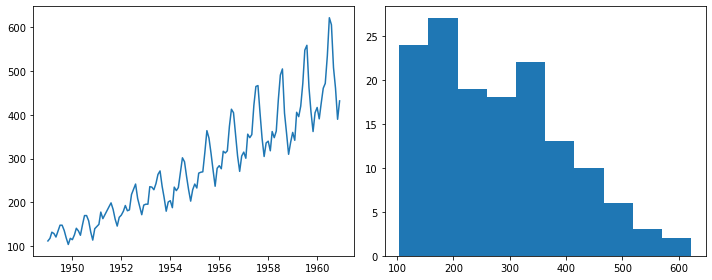

In [90]:
# plotting the time series before performing suitable power transformation
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.plot(airline_dataframe['Passengers'])
plt.subplot(1,2,2)
plt.hist(airline_dataframe['Passengers'])
plt.tight_layout()
plt.show()

- The reason for plotting line and distribution plots is to get to know which power transformation would be suitable in order to stabilize the variance present in the data. What type of transformation to be considered depends on the following aspects:
    - If the variation in the data happens to be quadratic variation in the data then it is better to implement square root transformation.
    - If the variation in the data happens to be exponential then we prefer log transformation.
    - Another last transformation method is Boxcox transformation. Using this we can perform some different sorts of power transformation based on lambda value being passed.:
        - If lambda = -1 =  reciprocal transformation
        - if lambda = -0.5 = negative square root transformation
        - if lambda = 0 = log transformation
        - if lambda = 0.5 = square root transformation
        - if lambda = 1 = no transformation
- Having understanding about different transformation methods, now we need to decide what transformation needs to be performed. Upon checking the variation in magnitude of time series we see that there exists a kind of exponential vairation. Hence it would be suitable to apply log transformation or boxcox transformation with lambda = 0.

In [91]:
# performing boxcox transformation in order to stabilize the variance present in data
from scipy.stats import boxcox
boxcox_data = pd.Series(boxcox(airline_dataframe['Passengers'], lmbda = 0), index = airline_dataframe.index)
# checking the boxcox series
boxcox_data.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
dtype: float64

- In above case we have explicitly defined the lambda value and accordingly performed one of the type of boxcox transformation. But let's perform boxcox transformation without passing any lambda value. In such it will automatically finds out the optimum value of lambda.

In [92]:
# performing boxcox transformation to obtain statistical lambda value
from scipy.stats import boxcox
boxcox_tune, boxcox_lambda = boxcox(airline_dataframe, lmbda = None)
boxcox_lambda[0]

0.14719790381387743

- From above we can see that upon passing lmbda = None which is the by default value, we have obtained the statistical optimum value of lambda. Using this lambda value let's perform the boxcox transformation and check how the variance has been stabilized in the time series.

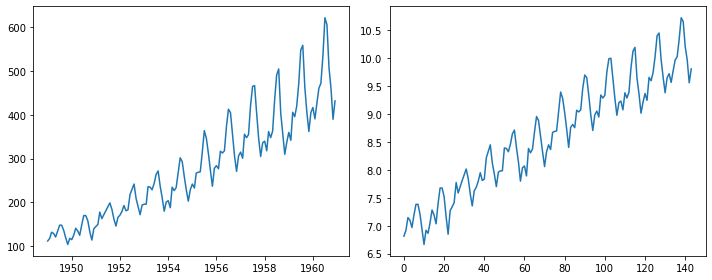

In [93]:
# plotting original and boxcox_tune time series
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.plot(airline_dataframe['Passengers'])
plt.subplot(1,2,2)
plt.plot(boxcox_tune)
plt.tight_layout()
plt.show()

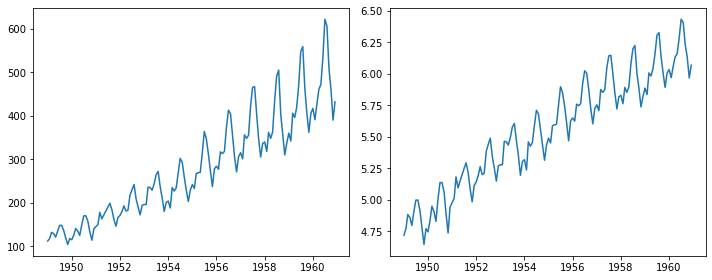

In [94]:
# plotting the original and boxcox transfromed time series data
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.plot(airline_dataframe, label = 'Airline passenger data before transformation')
plt.subplot(1,2,2)
plt.plot(boxcox_data, label = 'Airline passenger data after Boxcox transformation')
plt.tight_layout()
plt.show()

- From above subplots we can see that the variance has been stabilized after performing boxcox transformation. But still there exists Trend and Seasonality. In order to remove Trend and Seasonality we need to perform Differencing. There are no fixed number of iteration that we need to performing differencing to obtain stabilized mean data. It is just an trail and error method. After performing we need to check whether the resulted time series has become stationary or not through tests.

In [95]:
# peroforming differencing
boxcox_diff_series = pd.Series(boxcox_data - boxcox_data.shift(1), index = airline_dataframe.index)
# removing the null values since the differenced result will have null values
boxcox_diff_series.dropna(inplace =  True)
# checking the 1st order differenced series
boxcox_diff_series

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 143, dtype: float64

- In differencing as the name suggests we will be performing difference between consecutive numbers in order to remove the difference in level there by eliminating or reducing the Trend and Seasonality in the data. Upon performing differencing at each iteration it is better to check whether the difference result is now a stationary time series or not.

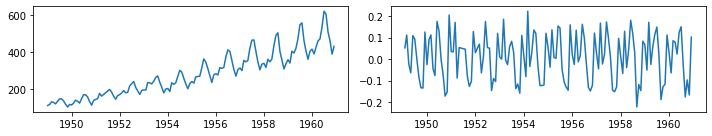

In [96]:
# plotting the original data and the transformed and differencing dataframe
plt.figure(figsize= (10,2))
plt.subplot(1,2,1)
plt.plot(airline_dataframe['Passengers'], label = 'Original Airline Passenger dataframe')
plt.subplot(1,2,2)
plt.plot(boxcox_diff_series, label = 'Differencing and Transformed Data')
plt.tight_layout()
plt.show()

- From above we can see that now the time series have become more or less stabilized in mean and variance and also doesn't have any seasonality and cyclicity. Let's statitically check whether the resulted data is now a stationary series or not.

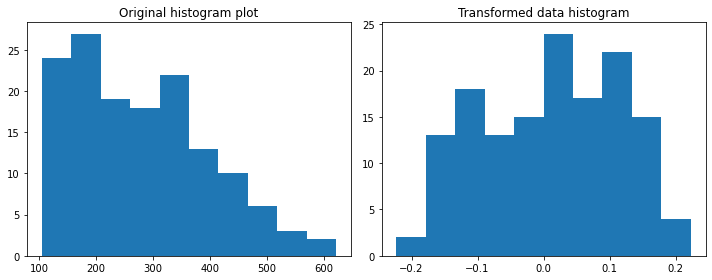

In [97]:
# checking the histogram distribution of the data after transformation and differencing
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.hist(airline_dataframe['Passengers'])
plt.title('Original histogram plot')
plt.subplot(1,2,2)
plt.hist(boxcox_diff_series)
plt.title('Transformed data histogram')
plt.tight_layout()
plt.show()

- From above distribution we can see that the transformed distribution is close to uniform or guassian distribution. Since we have applied boxcox and differencing, our resulting time series would have stabilized mean and variance. As a result it can be considered as stationary series. Let's further concrete our conclusion using statistical tests like KPSS and ADF tests.

In [98]:
# checking stationarity using ADF test
adf_test_transformed = adfuller(boxcox_diff_series)
# checking the p value associated with the test
adf_test_transformed[1]

0.015326212237944597

- From above p value we can see that p value is less than alpha hence we fail to reject the null hypothesis. As a result the time series now we have is a stationary series. Which can be used to perform Auto Regressive Forecating.

- So, far we have covered one of the condition to perform auto regressive modeling. The other condition is Auto correlation. Let's look at the topics surrounding correlation.

### Auto- Correlation

- Auto correlation is important factor in time series forecasting. This can be considered in analogy with correlation which is used in regression in order to check the relationship between independent and dependent variables. Here in time series we will not be having any exclusive independent variables. We consdier the past observations to be independent variables to predict the future dependent variables. The correaltion between past observations and current observation is referred to as auto correlation. This auto correlation can be measured uing two measures namely:
    - Auto correltions function
    - Partial auto correlation function
- Using these function plots we will get to know how the current observations is correlated with past observations. There exists subtle differences betweeen these measures.<br><br>
- __Auto Correlation Fucntion:__ Auto correlation not only computes the direct correlation between current and lagged observations which is present more than 1 time period lag but also the indirect correlation or the transistive correlation through the data points or observations present in between current and lagged observations. As a result we will not be knowing the direct relationship or correlation between current and lagged observations. In order to get direct correlation we have another alternative called Partial ACF.<br><br>
- __Partial Auto Correlation Function:__ It overcomes the problem of not being able to capture the direct correlation. Using partial auto correlation function we will get to know direct correlation without being capturing the transistive or indirect correlation.<br><br>
- One cavet needs to be remembered when analyzing the ACF or PACF plots is that a correlation is not be significant if it touches or crosses the confidence level bands. These confidence interval bands are inbuilt plotted as per the data.

<Figure size 720x288 with 0 Axes>

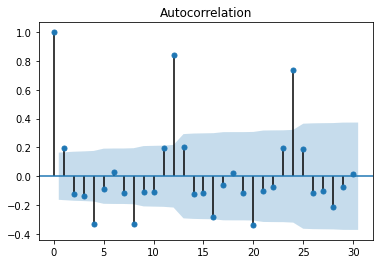

In [99]:
# Plotting ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize= (10,4))
plot_acf(boxcox_diff_series, lags = 30)
plt.show()

- From above acf plot we can see that there exists some significant and non significant correlations. In order to understand the correlation between cuurent observation and lag observation we consider lags of different levels. Let's check for the PACF plot as well.

<Figure size 720x288 with 0 Axes>

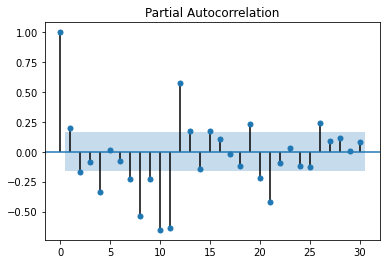

In [100]:
# plotting plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize= (10,4))
plot_pacf(boxcox_diff_series, lags  = 30)
plt.show()

- From PACF plot we will get to know the direct correlations between current observation and lag observations without involving indiredct correlations or transistive correlations through the intermediate observations.

- So, basically from these correlation functions we will get to know what are the significant previous observations which can be used to regression modeling.

### Auto Regressive Forecasting Model

- Using Auto Regressive model we forecast future observations considering linear combination of past observations. A parameter p is used to determine the number of lagged observations needed to be considered as a linear combination in order to built forecasting model. Here parameter p refers to the lag order, which means the maximum number of lag order which is used to build p number of observations to predict the future observations.

In [101]:
# coverting the boxcox series into dataframe
boxcox_diff = pd.DataFrame(boxcox_diff_series, columns= ['Passengers'])
# checking the head of the dataframe
boxcox_diff.head()

,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484


In [102]:
# splitting the data into train and test after transformation (just boxcox transformation)
train_data_boxcox = boxcox_data[:train_len]
test_data_boxcox = boxcox_data[train_len:]
# splitting the data into train and test after boxcox an diff transformation
train_data_boxcox_diff = boxcox_diff_series[:train_len-1]
test_data_boxcox_diff  = boxcox_diff_series[train_len-1:]

- The reason for considering train_len-1 is because when performing differencing of shift(1) we will get NAN value for the 1st row because of which we will drop the row. Hence we consider train_len-1 as the index.

In [103]:
# importing the necessary package
from statsmodels.tsa.arima_model import ARIMA
# defining the model object
model_ar = ARIMA(train_data_boxcox_diff, order=(1,0,0)) # performing simple 1st order AR model
# fitting the ar model
model_ar_fit = model_ar.fit()

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [104]:
# checking the params of the ar model
model_ar_fit.params

const      0.009477
ar.L1.y    0.183116
dtype: float64

- From above params we can see the intercept and coefficients of the linear combination of 1st order lag observations.

In [105]:
# making predictions considering a dataframe
y_ar = boxcox_diff
# adding column to represent the forecasts or the predictions
y_ar['ar_forecasts_diff'] = model_ar_fit.predict(start= boxcox_diff_series.index.min(), end = boxcox_diff_series.index.max())
# reversing the predictions by reversing the diff transformation
y_ar['ar_forecasts_boxcox'] = y_ar['ar_forecasts_diff'].cumsum()
# adding the inital data point which has been removed upon differencing
y_ar['ar_forecasts_boxcox'] = y_ar['ar_forecasts_boxcox'].add(boxcox_data[0])
# reversing the transformation made by performing log transformation using boxcox
y_ar['ar_forecasts'] = np.exp(y_ar['ar_forecasts_boxcox'])
# adding column to present actual passenger details
y_ar['actual_passengers_count'] =  airline_dataframe['Passengers']
# checking the head of the dataframe
y_ar.head()

,Passengers,ar_forecasts_diff,ar_forecasts_boxcox,ar_forecasts,actual_passengers_count
Month,,,,,
1949-02-01,0.052186,0.009477,4.727976,113.066460,118.0
1949-03-01,0.112117,0.017298,4.745273,115.039252,132.0
1949-04-01,-0.022990,0.028272,4.773545,118.338060,129.0
1949-05-01,-0.064022,0.003532,4.777077,118.756743,121.0
1949-06-01,0.109484,-0.003982,4.773095,118.284804,135.0


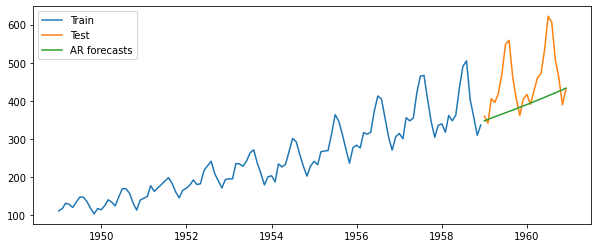

In [106]:
# plotting the train, test and forecasts
plt.figure(figsize=(10,4))
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(y_ar['ar_forecasts'][test_data.index.min():], label = 'AR forecasts')
plt.legend(loc = 0)
plt.show()

- From above plot we can see that using simple AR model we are able to capture the level of the test data as the line is closer to the mean of the test data. Also, slight trend we are able to capture. Upon considering large number of lag order we may be better forecasting the future data points. Let's consider larger lag order value upon observing PACF plot.

In [107]:
# checking the error metrics for the forecasts made by simple auto regressive model
rmse_ar = round(np.sqrt(mean_squared_error(test_data, y_ar['ar_forecasts'][test_data.index.min():])),2)
mape_ar = round(np.mean((np.abs(test_data- y_ar['ar_forecasts'][test_data.index.min():])/test_data)*100),2)
temp_dataframe = pd.DataFrame({'Method': ['Auto Regressive Model'], 'RMSE':[rmse_ar], 'MAPE':[mape_ar]})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91
0,Auto Regressive Model,93.39,13.77


- From above we can see that it is performing better than simple moving average smoothoing method but not better than any of the second order or third order exponential smoothing methods.

### Moving Average Forecasting Model

- In the previous Auto regressive model we have modelled as a linear combination of past observations. To account for how many past observation we use a parameter p which is obtained from PACF plot. In this method of auto regressive model we consider a linear combination of previous or past observations forecast errors. In order to account for how many previous observations forecast errors need to be considered we use a parameter q which is obtained from ACF plot. The parameter q is referred to maximum lag order after which auto correlation dies out. Let's model moving average on our airline passenegers data.

In [108]:
# defining the model object
model_ma = ARIMA(train_data_boxcox_diff, order = (0,0,1))
# fitting the model
model_ma_fit = model_ma.fit()
# checking the parameters
model_ma_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.009538
ma.L1.y    0.266103
dtype: float64

In [109]:
# making forecasts using the model
y_airline_ma = pd.DataFrame(boxcox_diff_series)
# adding column to represent forecasts made on boxcox diff data
y_airline_ma['ma_forecasts_boxcox_diff'] = model_ma_fit.predict(boxcox_diff.index.min(), boxcox_diff.index.max())
# removing diff
y_airline_ma['ma_forecasts_boxcox'] = y_airline_ma['ma_forecasts_boxcox_diff'].cumsum()
# adding the 1st row
y_airline_ma['ma_forecasts_boxcox'] = y_airline_ma['ma_forecasts_boxcox'].add(boxcox_data[0])
# removing log transformation
y_airline_ma['ma_forecasts'] = np.exp(y_airline_ma['ma_forecasts_boxcox'])
# checking the head of the dataframe
y_airline_ma.head()

,0,ma_forecasts_boxcox_diff,ma_forecasts_boxcox,ma_forecasts
Month,,,,
1949-02-01,0.052186,0.009538,4.728037,113.073386
1949-03-01,0.112117,0.020136,4.748173,115.373351
1949-04-01,-0.022990,0.033901,4.782074,119.351617
1949-05-01,-0.064022,-0.005595,4.776478,118.685656
1949-06-01,0.109484,-0.006009,4.770470,117.974623


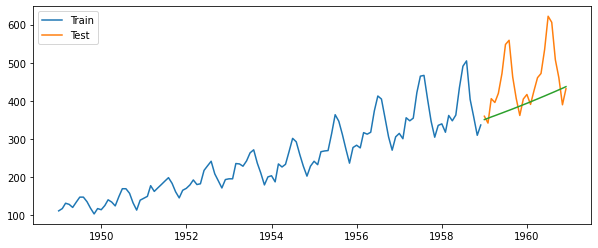

In [110]:
# plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(y_airline_ma['ma_forecasts'][test_data.index.min():])
plt.legend(loc = 0)
plt.show()

In [111]:
# checking the error metrics for the forecasts made by simple auto regressive model
rmse_airline_ma = round(np.sqrt(mean_squared_error(test_data, y_airline_ma['ma_forecasts'][test_data.index.min():])),2)
mape_airline_ma = round(np.mean((np.abs(test_data- y_airline_ma['ma_forecasts'][test_data.index.min():])/test_data)*100),2)
temp_dataframe = pd.DataFrame({'Method': ['Moving Average Model'], 'RMSE':[rmse_airline_ma], 'MAPE':[mape_airline_ma]})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91
0,Auto Regressive Model,93.39,13.77
0,Moving Average Model,91.21,13.39


- From above we can see that the model peformance is slightly better than Simple Auto regresive model.

### AR MA model

In [112]:
# defining the model object
model_arma = ARIMA(train_data_boxcox_diff, order = (1,0,1))
# fitting the model
model_arma_fit = model_arma.fit()
# checking the parmas
model_arma_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64

In [113]:
# making the forecasts using the model
y_arma = pd.DataFrame(boxcox_diff_series, columns= ['BoxCox_Diff_values'])
# adding the column to represent the forecasts
y_arma['arma_forecasts_boxcox_diff'] = model_arma_fit.predict(boxcox_diff_series.index.min(), boxcox_diff_series.index.max())
# remocing the diff
y_arma['arma_forecasts_boxcox'] = y_arma['arma_forecasts_boxcox_diff'].cumsum()
# adding intial data point
y_arma['arma_forecasts_boxcox'] = y_arma['arma_forecasts_boxcox'].add(boxcox_data[0])
# removing log
y_arma['arma_forecasts'] = np.exp(y_arma['arma_forecasts_boxcox'])
# checking the head 
y_arma.head()

,BoxCox_Diff_values,arma_forecasts_boxcox_diff,arma_forecasts_boxcox,arma_forecasts
Month,,,,
1949-02-01,0.052186,0.009624,4.728123,113.083060
1949-03-01,0.112117,0.018025,4.746148,115.139891
1949-04-01,-0.022990,0.026532,4.772680,118.235712
1949-05-01,-0.064022,-0.011365,4.761316,116.899616
1949-06-01,0.109484,0.007305,4.768621,117.756746


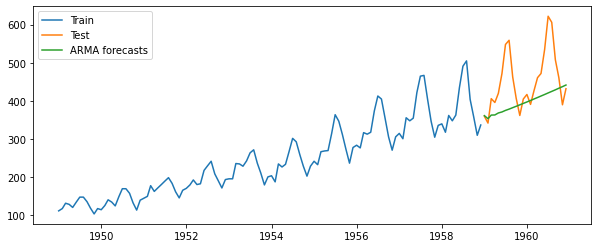

In [114]:
# plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(y_arma['arma_forecasts'][test_data.index.min():], label = 'ARMA forecasts')
plt.legend(loc = 0)
plt.show()

- From above plot we can see that the model is able to capture the trend and level of the test data points.

In [115]:
# checking the error metrics
rmse_airline_arma = round(np.sqrt(mean_squared_error(test_data, y_arma['arma_forecasts'][test_data.index.min():])),2)
mape_airline_arma = round(np.mean((np.abs(test_data- y_arma['arma_forecasts'][test_data.index.min():])/test_data)*100),2)
temp_dataframe = pd.DataFrame({'Method': ['ARMA Model'], 'RMSE':[rmse_airline_arma], 'MAPE':[mape_airline_arma]})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91
0,Auto Regressive Model,93.39,13.77
0,Moving Average Model,91.21,13.39
0,ARMA Model,88.88,12.89


### ARIMA model

In [116]:
# defining the model object
model_arima = ARIMA(train_data_boxcox, order = (1,1,1))
# fitting the model
model_arima_fit = model_arima.fit()
# checking the parmas
model_arima_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64

In [117]:
# making predictions using the model
y_arima = pd.DataFrame(boxcox_diff_series, columns = ['boxcox_diff'])
# making predictions
y_arima['arima_forecasts_boxcox_diff'] = model_arima_fit.predict(boxcox_diff_series.index.min(), boxcox_diff_series.index.max())
# removing diff
y_arima['arima_forecasts_boxcox'] = y_arima['arima_forecasts_boxcox_diff'].cumsum()
# adding 0th index elemend
y_arima['arima_forecasts_boxcox'] = y_arima['arima_forecasts_boxcox'].add(boxcox_data[0])
# removing log transformation
y_arima['arima_forecasts'] = np.exp(y_arima['arima_forecasts_boxcox'])
# checking the head
y_arima.head()

,boxcox_diff,arima_forecasts_boxcox_diff,arima_forecasts_boxcox,arima_forecasts
Month,,,,
1949-02-01,0.052186,0.009624,4.728123,113.083060
1949-03-01,0.112117,0.018025,4.746148,115.139891
1949-04-01,-0.022990,0.026532,4.772680,118.235712
1949-05-01,-0.064022,-0.011365,4.761316,116.899616
1949-06-01,0.109484,0.007305,4.768621,117.756746


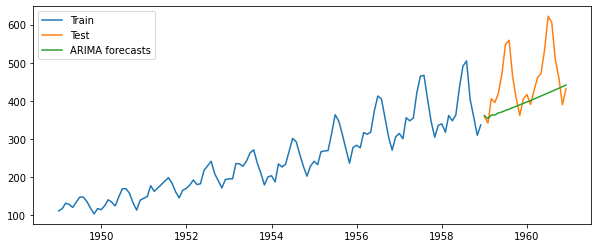

In [118]:
# plotting train, test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(y_arima['arima_forecasts'][test_data.index.min():], label = 'ARIMA forecasts')
plt.legend(loc = 0)
plt.show()

In [119]:
# checking the error metrics
rmse_airline_arima = round(np.sqrt(mean_squared_error(test_data, y_arima['arima_forecasts'][test_data.index.min():])),2)
mape_airline_arima = round(np.mean((np.abs(test_data- y_arima['arima_forecasts'][test_data.index.min():])/test_data)*100),2)
temp_dataframe = pd.DataFrame({'Method': ['ARIMA Model'], 'RMSE':[rmse_airline_arima], 'MAPE':[mape_airline_arima]})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91
0,Auto Regressive Model,93.39,13.77
0,Moving Average Model,91.21,13.39
0,ARMA Model,88.88,12.89


### SARIMA

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(train_data_boxcox, order = (1,1,1), seasonal_order= (1,1,1,12))
model_sarima_fit = model_sarima.fit()
model_sarima_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1       0.388460
ma.L1      -0.678612
ar.S.L12   -0.043682
ma.S.L12   -0.516362
sigma2      0.001405
dtype: float64

In [121]:
# making predictions using the model object
y_sarima = pd.DataFrame(boxcox_diff_series, columns = ['boxcox_diff'])
# adding column to represent the forecasts
y_sarima['sarima_forecasts_boxcox'] = model_sarima_fit.predict(boxcox_diff_series.index.min(), boxcox_diff_series.index.max())
# removing the log transformation
y_sarima['sarima_forecasts'] = np.exp(y_sarima['sarima_forecasts_boxcox'])
# checking the head of the dataframe
y_sarima.head()

,boxcox_diff,sarima_forecasts_boxcox,sarima_forecasts
Month,,,
1949-02-01,0.052186,4.718499,112.0
1949-03-01,0.112117,4.770685,118.0
1949-04-01,-0.022990,4.882802,132.0
1949-05-01,-0.064022,4.859812,129.0
1949-06-01,0.109484,4.795791,121.0


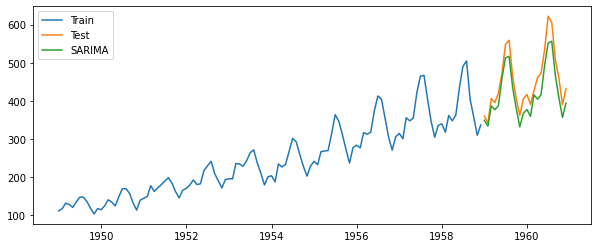

In [122]:
# plotting train , test and forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(y_sarima['sarima_forecasts'][test_data.index.min():], label = 'SARIMA')
plt.legend(loc = 0)
plt.show()

In [123]:
# checking the error metrics
rmse_airline_sarima = round(np.sqrt(mean_squared_error(test_data, y_sarima['sarima_forecasts'][test_data.index.min():])),2)
mape_airline_sarima = round(np.mean((np.abs(test_data- y_sarima['sarima_forecasts'][test_data.index.min():])/test_data)*100),2)
temp_dataframe = pd.DataFrame({'Method': ['SARIMA Model'], 'RMSE':[rmse_airline_sarima], 'MAPE':[mape_airline_sarima]})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91
0,Auto Regressive Model,93.39,13.77
0,Moving Average Model,91.21,13.39
0,ARMA Model,88.88,12.89


### SARIMAX

In [124]:
# reading the exogenous vairable
promo_dataframe = pd.read_csv('promotion.csv', header = None)
# renaming the column names
promo_dataframe.columns = ['Month', 'Promotion']
# changing the data type of Month column
promo_dataframe['Month'] = pd.to_datetime(promo_dataframe['Month'])
# setting the Month columnas index
promo_dataframe.set_index('Month', inplace = True)
# checking the head of the dataframe
promo_dataframe.head()

,Promotion
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0


In [125]:
# splitting the data into train and test
train_promo = promo_dataframe[:train_len]
test_promo = promo_dataframe[train_len:]

In [126]:
# defining the model object
model_sarimax = SARIMAX(train_data_boxcox, order = (1,1,1), seasonal_order= (1,1,1,12), exog= train_promo)
# fitting the data 
model_sarimax_fit = model_sarimax.fit()
# checking the params
model_sarimax_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Promotion    0.034345
ar.L1        0.479401
ma.L1       -0.741823
ar.S.L12    -0.063911
ma.S.L12    -0.558235
sigma2       0.001335
dtype: float64

In [127]:
# making predictions by defining the dataframe
y_sarimax = pd.DataFrame()
# adding column to represent predictions
y_sarimax['sarimax_forecasts_boxcox'] = model_sarimax_fit.predict(boxcox_diff_series.index.min(), boxcox_diff_series.index.max(), exog = test_promo)
# remocving log transformation
y_sarimax['sarimax_forecasts'] = np.exp(y_sarimax['sarimax_forecasts_boxcox'])
# checking the head 
y_sarimax.head()

,sarimax_forecasts_boxcox,sarimax_forecasts
1949-02-01,4.718499,112.0
1949-03-01,4.770685,118.0
1949-04-01,4.882802,132.0
1949-05-01,4.859812,129.0
1949-06-01,4.795791,121.0


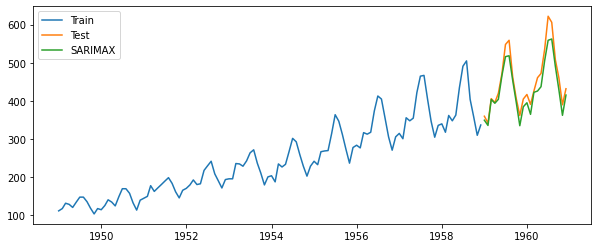

In [128]:
# plot train,test,forecasts
plt.figure(figsize= (10,4))
plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(y_sarimax['sarimax_forecasts'][test_data.index.min():], label = 'SARIMAX')
plt.legend(loc = 0)
plt.show()

In [129]:
# checking the error  metircs
rmse_airline_sarimax = round(np.sqrt(mean_squared_error(test_data, y_sarimax['sarimax_forecasts'][test_data.index.min():])),2)
mape_airline_sarimax = round(np.mean((np.abs(test_data- y_sarimax['sarimax_forecasts'][test_data.index.min():])/test_data)*100),2)
temp_dataframe = pd.DataFrame({'Method': ['SARIMAX Model'], 'RMSE':[rmse_airline_sarimax], 'MAPE':[mape_airline_sarimax]})
error_dataframe = pd.concat([error_dataframe, temp_dataframe], axis = 0)
error_dataframe

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple Moving Average,103.33,15.54
0,Simple Exponential Smoothing,107.65,16.49
0,Holts Exponential Smoothing,71.94,11.11
0,Holts Winter Exponential Additive Smoothing,35.10,6.53
0,Holts Winter Exponential Multiplicative Smoothing,34.83,6.91
0,Auto Regressive Model,93.39,13.77
0,Moving Average Model,91.21,13.39
0,ARMA Model,88.88,12.89


- From the above dataframe we can see that SARIMAX has done the best job in making forecasts on the test data. Since SARIMAX captures exogenous variable as the linear combination it able to perform or forecast well on the test data. One cavet need to be remembered when performing SARIMAX is that we should be knowing about th external variables for the forecasts period as well. Then only we could make use of external variables in making accurate predictions. Since SARIMAX captures Seasonality, Trend, level and exognes affect we are able to perform well on the test data.

## Rail Dataframe

In [130]:
# importing the dataset
rail_dataframe = pd.read_csv('Metrail+dataset.csv')
rail_dataframe.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [131]:
# renaming the columns
rail_dataframe.rename(columns= {'Travellers(\'000)': 'Travellers'}, inplace= True)

In [132]:
# checking the dataframe after renaming
rail_dataframe.head()

,Month,Travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [133]:
# checking the missing values in Travellers
rail_dataframe['Travellers'].isnull().sum()

11

In [134]:
# creating new column for last_observation missing imputaion
rail_dataframe = rail_dataframe.assign(last_observation_imputation = rail_dataframe['Travellers'])
rail_dataframe.head()

,Month,Travellers,last_observation_imputation
0,Jan-91,1724.0,1724.0
1,Feb-91,1638.0,1638.0
2,Mar-91,1987.0,1987.0
3,Apr-91,1825.0,1825.0
4,May-91,NaN,NaN


In [135]:
# identifying the missing values
rail_dataframe.loc[rail_dataframe['Travellers'].isnull(),:]

,Month,Travellers,last_observation_imputation
4,May-91,NaN,NaN
12,Jan-92,NaN,NaN
16,May-92,NaN,NaN
26,Mar-93,NaN,NaN
31,Aug-93,NaN,NaN
73,Feb-97,NaN,NaN
80,Sep-97,NaN,NaN
96,Jan-99,NaN,NaN
105,Oct-99,NaN,NaN
135,Apr-02,NaN,NaN


In [136]:
missing_values_index_list = [4, 12, 16, 26, 31, 73, 80, 96, 105, 135, 151]
for index in missing_values_index_list:
    new_index = index - 1
    rail_dataframe.iloc[index, 2] = rail_dataframe.iloc[new_index,2]
# checking the missing values after neareast neighborhood imputation
rail_dataframe.iloc[missing_values_index_list, 2]

4      1825.0
12     1831.0
16     1973.0
26     1632.0
31     1949.0
73     1412.0
80     2021.0
96     1861.0
105    1622.0
135    2032.0
151    2236.0
Name: last_observation_imputation, dtype: float64

In [137]:
# checking the mean after last observation imputation
rail_dataframe['last_observation_imputation'].mean()

1838.685534591195

In [138]:
# creating a new column for nex_value_imputation
rail_dataframe = rail_dataframe.assign(next_observation_imputation = rail_dataframe['Travellers'])
rail_dataframe.head()

,Month,Travellers,last_observation_imputation,next_observation_imputation
0,Jan-91,1724.0,1724.0,1724.0
1,Feb-91,1638.0,1638.0,1638.0
2,Mar-91,1987.0,1987.0,1987.0
3,Apr-91,1825.0,1825.0,1825.0
4,May-91,NaN,1825.0,NaN


In [139]:
# imputing the missing values in next_observation_imputation using next observation
for index in missing_values_index_list:
    new_index = index +1
    rail_dataframe.iloc[index,3] = rail_dataframe.iloc[new_index,3]

In [140]:
# checking the column after imputation
rail_dataframe.loc[rail_dataframe['Travellers'].isnull(), :]

,Month,Travellers,last_observation_imputation,next_observation_imputation
4,May-91,NaN,1825.0,1879.0
12,Jan-92,NaN,1831.0,1574.0
16,May-92,NaN,1973.0,1637.0
26,Mar-93,NaN,1632.0,1974.0
31,Aug-93,NaN,1949.0,1690.0
73,Feb-97,NaN,1412.0,1721.0
80,Sep-97,NaN,2021.0,1790.0
96,Jan-99,NaN,1861.0,1562.0
105,Oct-99,NaN,1622.0,1864.0
135,Apr-02,NaN,2032.0,2086.0


In [141]:
# checking the mean of the column
rail_dataframe['next_observation_imputation'].mean()

1834.446540880503

In [142]:
# creating a new column for linear_interpolation
rail_dataframe = rail_dataframe.assign(linear_interpolation_imputation = rail_dataframe['Travellers'].interpolate(method = 'linear'))
rail_dataframe.head()

,Month,Travellers,last_observation_imputation,next_observation_imputation,linear_interpolation_imputation
0,Jan-91,1724.0,1724.0,1724.0,1724.0
1,Feb-91,1638.0,1638.0,1638.0,1638.0
2,Mar-91,1987.0,1987.0,1987.0,1987.0
3,Apr-91,1825.0,1825.0,1825.0,1825.0
4,May-91,NaN,1825.0,1879.0,1852.0


In [143]:
# checking the mean of linear_interpolation column
rail_dataframe['linear_interpolation_imputation'].mean()

1836.566037735849

### Exchange rate time series analysis

In [144]:
# reading the data
exchangerate_dataframe = pd.read_csv('exchange-rate-twi.csv')
# checking the head of the dataframe
exchangerate_dataframe.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [145]:
# checking the shape of the dataframe
exchangerate_dataframe.shape

(304, 2)

In [146]:
# checking for the missing values in the dataframe
exchangerate_dataframe.isnull().sum()

Month                0
Exchange Rate TWI    0
dtype: int64

In [147]:
# checking the data type of the columns
exchangerate_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              304 non-null    int64  
 1   Exchange Rate TWI  304 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [148]:
# setting Month column as index
exchangerate_dataframe.set_index('Month', inplace = True)

In [149]:
# Splitting the data into train and test
train_exchange_rate = exchangerate_dataframe[0:212]
test_exchange_rate = exchangerate_dataframe[212:]

In [150]:
# checking train data
train_exchange_rate.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [151]:
# checking test dataframe
test_exchange_rate.head()

,Exchange Rate TWI
Month,
213,52.5
214,53.1
215,53.8
216,55.2
217,58.9


In [152]:
# making forecasts using simple average method
y_avg_exchangerate = test_exchange_rate.copy()
# adding new column representing the simple average forecast
y_avg_exchangerate['simple_avg_forecast'] = round(train_exchange_rate['Exchange Rate TWI'].mean(),2)
# checking the head of the dataframe
y_avg_exchangerate.head()

,Exchange Rate TWI,simple_avg_forecast
Month,,
213,52.5,88.33
214,53.1,88.33
215,53.8,88.33
216,55.2,88.33
217,58.9,88.33


In [153]:
# checking the error metrics
rmse_exchange_sime = round(np.sqrt(mean_squared_error(y_avg_exchangerate['Exchange Rate TWI'], y_avg_exchangerate['simple_avg_forecast'])),2)
mape_exchangerate_sime = round(np.mean((np.abs(y_avg_exchangerate['Exchange Rate TWI']- y_avg_exchangerate['simple_avg_forecast'])/y_avg_exchangerate['Exchange Rate TWI'])*100),2)
print(rmse_exchange_sime, mape_exchangerate_sime)

32.42 58.13


In [154]:
# making forecasts using naive method
y_naive_exchangerate = test_exchange_rate.copy()
# adding new column for naive forecasts
y_naive_exchangerate['naive_forecasts'] = train_exchange_rate['Exchange Rate TWI'][212]
# checking the head of the dataframe
y_naive_exchangerate.head()

,Exchange Rate TWI,naive_forecasts
Month,,
213,52.5,52.0
214,53.1,52.0
215,53.8,52.0
216,55.2,52.0
217,58.9,52.0


In [155]:
# checking the error metrics
rmse_exchange_naive = round(np.sqrt(mean_squared_error(y_naive_exchangerate['Exchange Rate TWI'], y_naive_exchangerate['naive_forecasts'])),2)
mape_exchangerate_naive = round(np.mean((np.abs(y_naive_exchangerate['Exchange Rate TWI']- y_naive_exchangerate['naive_forecasts'])/y_naive_exchangerate['Exchange Rate TWI'])*100),2)
accuracy_naive_exchangerate = np.round(100-mape_exchangerate_naive, 2)
print(rmse_exchange_naive, mape_exchangerate_naive, accuracy_naive_exchangerate)

5.98 8.41 91.59


### SMA with window size = 12

In [156]:
# performing simple moving average on exchange rate dataframe
y_sma_exchangerate = train_exchange_rate.copy()
# adding column to represent the forecasts made by simple moving average
y_sma_exchangerate['sma_forecasts'] = train_exchange_rate['Exchange Rate TWI'].rolling(window = 12).mean()
# checking the head of the dataframe
y_sma_exchangerate.head()

,Exchange Rate TWI,sma_forecasts
Month,,
1,100.0,NaN
2,99.6,NaN
3,99.4,NaN
4,99.1,NaN
5,99.2,NaN


In [157]:
# making predictions using simple average on the test set
test_exchange_rate['sma_forecasts'] = y_sma_exchangerate['sma_forecasts'][212]
# checking head of the test dataframe
test_exchange_rate.head()

,Exchange Rate TWI,sma_forecasts
Month,,
213,52.5,54.325
214,53.1,54.325
215,53.8,54.325
216,55.2,54.325
217,58.9,54.325


In [158]:
# computing the error metrics on the predictions made by simple moving average
rmse_sma_exchangerate_12 = np.round(np.sqrt(mean_squared_error(test_exchange_rate['Exchange Rate TWI'], test_exchange_rate['sma_forecasts'])),2)
mape_sma_exchangerate_12 = np.round(np.mean((np.abs(test_exchange_rate['Exchange Rate TWI']-  test_exchange_rate['sma_forecasts'])/test_exchange_rate['Exchange Rate TWI'])*100),2)
print(rmse_sma_exchangerate_12, mape_sma_exchangerate_12)                         

4.66 6.96


### SMA with window size = 6

In [159]:
# adding column to represent the forecasts made by simple moving average
y_sma_exchangerate['sma_forecasts_6'] = train_exchange_rate['Exchange Rate TWI'].rolling(window = 6).mean()
# checking the head of the dataframe
y_sma_exchangerate.head()

,Exchange Rate TWI,sma_forecasts,sma_forecasts_6
Month,,,
1,100.0,NaN,NaN
2,99.6,NaN,NaN
3,99.4,NaN,NaN
4,99.1,NaN,NaN
5,99.2,NaN,NaN


In [160]:
# making predictions using simple average on the test set
test_exchange_rate['sma_forecasts_6'] = y_sma_exchangerate['sma_forecasts_6'][212]
# checking head of the test dataframe
test_exchange_rate.head()

,Exchange Rate TWI,sma_forecasts,sma_forecasts_6
Month,,,
213,52.5,54.325,53.783333
214,53.1,54.325,53.783333
215,53.8,54.325,53.783333
216,55.2,54.325,53.783333
217,58.9,54.325,53.783333


In [161]:
# computing the error metrics on the predictions made by simple moving average
rmse_sma_exchangerate_6 = np.round(np.sqrt(mean_squared_error(test_exchange_rate['Exchange Rate TWI'], test_exchange_rate['sma_forecasts_6'])),2)
mape_sma_exchangerate_6 = np.round(np.mean((np.abs(test_exchange_rate['Exchange Rate TWI']-  test_exchange_rate['sma_forecasts_6'])/test_exchange_rate['Exchange Rate TWI'])*100),2)
print(rmse_sma_exchangerate_6, mape_sma_exchangerate_6)   

4.9 7.13


### SMA with window size = 3

In [162]:
# adding column to represent the forecasts made by simple moving average
y_sma_exchangerate['sma_forecasts_3'] = train_exchange_rate['Exchange Rate TWI'].rolling(window = 3).mean()
# checking the head of the dataframe
y_sma_exchangerate.head()

,Exchange Rate TWI,sma_forecasts,sma_forecasts_6,sma_forecasts_3
Month,,,,
1,100.0,NaN,NaN,NaN
2,99.6,NaN,NaN,NaN
3,99.4,NaN,NaN,99.666667
4,99.1,NaN,NaN,99.366667
5,99.2,NaN,NaN,99.233333


In [163]:
# making predictions using simple average on the test set
test_exchange_rate['sma_forecasts_3'] = y_sma_exchangerate['sma_forecasts_3'][212]
# checking head of the test dataframe
test_exchange_rate.head()

,Exchange Rate TWI,sma_forecasts,sma_forecasts_6,sma_forecasts_3
Month,,,,
213,52.5,54.325,53.783333,52.0
214,53.1,54.325,53.783333,52.0
215,53.8,54.325,53.783333,52.0
216,55.2,54.325,53.783333,52.0
217,58.9,54.325,53.783333,52.0


In [164]:
# computing the error metrics on the predictions made by simple moving average
rmse_sma_exchangerate_3 = np.round(np.sqrt(mean_squared_error(test_exchange_rate['Exchange Rate TWI'], test_exchange_rate['sma_forecasts_3'])),2)
mape_sma_exchangerate_3 = np.round(np.mean((np.abs(test_exchange_rate['Exchange Rate TWI']-  test_exchange_rate['sma_forecasts_3'])/test_exchange_rate['Exchange Rate TWI'])*100),2)
print(rmse_sma_exchangerate_3, mape_sma_exchangerate_3)  

5.98 8.41


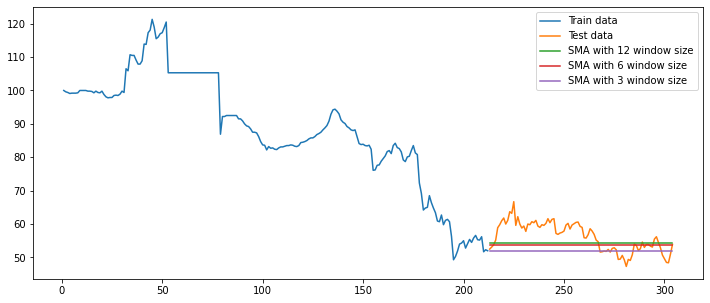

In [165]:
# plotting train, test , forecasts
plt.figure(figsize=(12,5))
plt.plot(train_exchange_rate, label =  'Train data')
plt.plot(test_exchange_rate['Exchange Rate TWI'], label = 'Test data')
plt.plot(test_exchange_rate['sma_forecasts'], label = 'SMA with 12 window size')
plt.plot(test_exchange_rate['sma_forecasts_6'], label = 'SMA with 6 window size')
plt.plot(test_exchange_rate['sma_forecasts_3'], label = 'SMA with 3 window size')
plt.legend(loc = 0)
plt.show()

In [166]:
# creating error dataframe for exchange rate
error_dataframe_exchangerate = pd.DataFrame({'Method': ['sma_12','sma_6', 'sma_3'], 'RMSE': [rmse_sma_exchangerate_12, rmse_sma_exchangerate_6, rmse_sma_exchangerate_3], 'MAPE': [mape_sma_exchangerate_12, mape_sma_exchangerate_6, mape_sma_exchangerate_3]})
error_dataframe_exchangerate.head()

,Method,RMSE,MAPE
0,sma_12,4.66,6.96
1,sma_6,4.90,7.13
2,sma_3,5.98,8.41


In [167]:
# checking the mean of test data
test_exchange_rate['Exchange Rate TWI'].mean()

56.19021739130435

### Stationarity Check

In [168]:
# checking the dataframe again
exchangerate_dataframe.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [169]:
# checking the stationarity using Augumented Dickey Fuller test
adf_exchangerate_test = adfuller(exchangerate_dataframe['Exchange Rate TWI'])
# checking the the results of adf_test
adf_exchangerate_test

(-0.8054678720541549,
 0.8175106426685046,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

In [170]:
# checking the p value of the adf_test
adf_exchangerate_test[1]

0.8175106426685046

- As per p value we can see that the value is close to 1. Hence we fail to reject null hypothesis saying that the time series data is not stationary. Let's also check using KPSS test.

In [171]:
# checking using KPSS test
kpss_exchangerate_test = kpss(exchangerate_dataframe['Exchange Rate TWI'])
# checking the results of KPSS test
kpss_exchangerate_test

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.7258967599333663,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [172]:
# checking the p value of the test
kpss_exchangerate_test[1]

0.01

- From above p value we can see that p value is less than 0.05 hence we reject Null hypothesis in support of alternate hypothesis. Hence we say that the time series data is not stationary.

## Daily Temperature data

In [173]:
# reading the data into dataframe
dailytemp_dataframe  = pd.read_csv('Daily+temperature+data.csv')
# checking the head of the dtaframe
dailytemp_dataframe.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


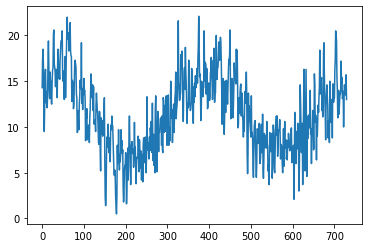

In [174]:
# plotting the Temperature data
plt.plot(dailytemp_dataframe['Temperature(Min)'])
plt.show()

In [175]:
# checking the shape
dailytemp_dataframe.shape

(730, 2)

In [176]:
# checking the info of the dataframe
dailytemp_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              730 non-null    object 
 1   Temperature(Min)  730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [177]:
# converting the date column into datetime format
dailytemp_dataframe['Date'] = pd.to_datetime(dailytemp_dataframe['Date'])

In [178]:
# checking the info of the dataframe after changing the data type
dailytemp_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              730 non-null    datetime64[ns]
 1   Temperature(Min)  730 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [179]:
# setting the index to date column
dailytemp_dataframe.set_index('Date', inplace = True)

In [180]:
# making train and test split
train_dailytemp = dailytemp_dataframe[0:511]
test_dailytemp = dailytemp_dataframe[511:]

In [181]:
# defining the ses model object
model_ses_dailytemp = SimpleExpSmoothing(train_dailytemp)
# fitting the model
model_fit_dailytemp = model_ses_dailytemp.fit(smoothing_level = 0.2, optimized =  False)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [182]:
# making forecasts using the model
y_ses_dailytemp = test_dailytemp.copy()
# adding column to represent forecasts
y_ses_dailytemp['ses_forecasts'] = model_fit_dailytemp.forecast(219)
# checking the head of the dataframe
y_ses_dailytemp.head()

,Temperature(Min),ses_forecasts
Date,,
2018-05-27,8.2,9.1997
2018-05-28,6.1,9.1997
2018-05-29,4.5,9.1997
2018-05-30,6.1,9.1997
2018-05-31,9.8,9.1997


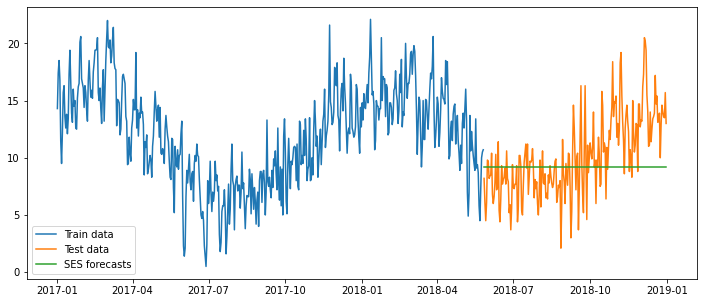

In [183]:
# plotting train, test, forecasts
plt.figure(figsize=(12,5))
plt.plot(train_dailytemp['Temperature(Min)'], label =  'Train data')
plt.plot(test_dailytemp['Temperature(Min)'] , label = 'Test data')
plt.plot(y_ses_dailytemp['ses_forecasts'], label = 'SES forecasts')
plt.legend(loc = 0)
plt.show()

In [184]:
# computing the error metrics
rmse_ses_dailytemp = round(np.sqrt(mean_squared_error(test_dailytemp['Temperature(Min)'], y_ses_dailytemp['ses_forecasts'])),2)
mape_ses_dailytemp = round(np.mean((np.abs(test_dailytemp['Temperature(Min)'] - y_ses_dailytemp['ses_forecasts'])/test_dailytemp['Temperature(Min)'])*100),2)
print(rmse_ses_dailytemp, mape_ses_dailytemp)

3.56 30.24


### Holt's Exponential Method

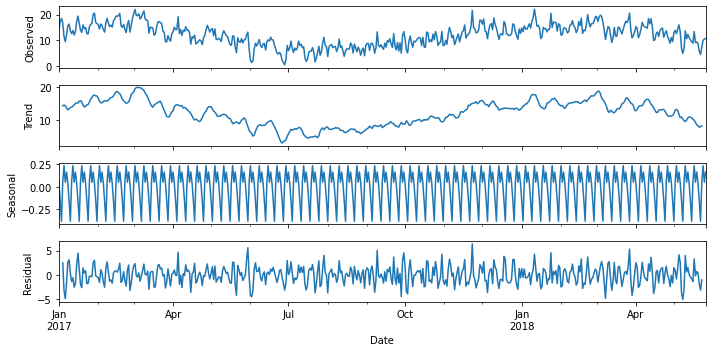

In [185]:
# performing additive decomposition of train data
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
decomposition_dailytemp = seasonal_decompose(train_dailytemp, model= 'additive')
# plotting decomposition
plt.rcParams['figure.figsize'] = (10,5)
decomposition_dailytemp.plot()
plt.show()

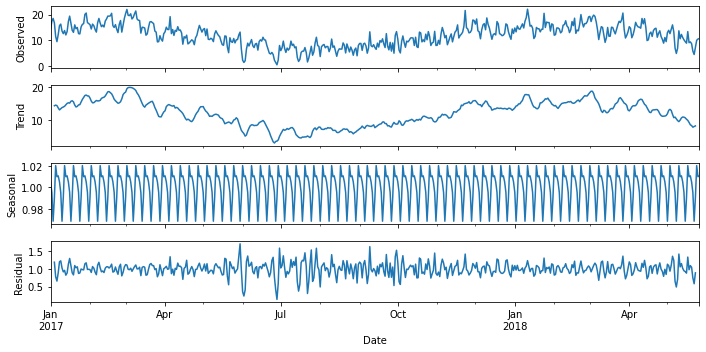

In [186]:
# performing multiplicative decomposition
decomposition_mul_dailytemp  = seasonal_decompose(train_dailytemp, model = 'multiplicative')
# plotting the decomposition
plt.rcParams['figure.figsize'] = (10,5)
decomposition_mul_dailytemp.plot()
plt.show()

- From both the cases we see that there exists sinosoidual pattern of trend hence in such case we prefer multiplicative trend when defining the model object for holt's method and holt's winter method.

In [187]:
# defining the model object
model_he = ExponentialSmoothing(np.array(train_dailytemp['Temperature(Min)']), trend = 'add', seasonal_periods=7, seasonal= False)
# fitting the model 
model_he_fit = model_he.fit(smoothing_level = 0.5, smoothing_slope = 0.01, optimized =  False)
# checking the parameters of the model
model_he_fit.params

{'smoothing_level': 0.5,
 'smoothing_slope': 0.01,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 14.3,
 'initial_slope': 3.099999999999998,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [188]:
# making predictions
y_he = test_dailytemp.copy()
# adding column to represent the forecasts
y_he['he_forecasts'] = model_he_fit.forecast(219)
# checking the head of the dataframe
y_he.head()

,Temperature(Min),he_forecasts
Date,,
2018-05-27,8.2,10.013934
2018-05-28,6.1,10.003336
2018-05-29,4.5,9.992737
2018-05-30,6.1,9.982139
2018-05-31,9.8,9.971541


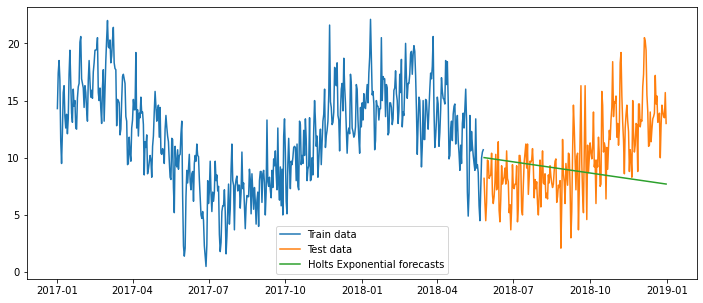

In [189]:
# plotting train, test, forecasts
plt.figure(figsize=(12,5))
plt.plot(train_dailytemp['Temperature(Min)'], label =  'Train data')
plt.plot(test_dailytemp['Temperature(Min)'] , label = 'Test data')
plt.plot(y_he['he_forecasts'], label = 'Holts Exponential forecasts')
plt.legend(loc = 0)
plt.show()

In [190]:
# checking the error metrics
rmse_he_dailytemp = round(np.sqrt(mean_squared_error(test_dailytemp['Temperature(Min)'], y_he['he_forecasts'])),2)
mape_he_dailytemp = round(np.mean((np.abs(test_dailytemp['Temperature(Min)'] - y_he['he_forecasts'])/test_dailytemp['Temperature(Min)'])*100),2)
print(rmse_he_dailytemp, mape_he_dailytemp)

4.11 34.17


### Holt's winter Additive Method

In [191]:
# defining the model object
model_hwa_dailytemp = ExponentialSmoothing(np.array(train_dailytemp['Temperature(Min)']), trend = 'add', seasonal_periods=30, seasonal= 'add')
# fitting the model 
model_hwa_dailytemp_fit = model_hwa_dailytemp.fit(optimized =  True)
# checking the parameters of the model
model_hwa_dailytemp_fit.params

{'smoothing_level': 0.6745292138301158,
 'smoothing_slope': 1.0431513205479446e-25,
 'smoothing_seasonal': 4.707966965049503e-25,
 'damping_slope': nan,
 'initial_level': 12.387662872371175,
 'initial_slope': 1.9615197362026022e-23,
 'initial_seasons': array([3.06547288, 2.5713481 , 2.59307077, 3.10277808, 2.57722079,
        2.39878848, 2.50844052, 3.15939916, 3.3103466 , 2.99070955,
        3.07135408, 2.81685971, 1.82080846, 2.77169595, 2.96975159,
        2.9972794 , 1.94804973, 2.75754274, 2.45542241, 1.77700775,
        1.99860378, 2.83158213, 1.6587459 , 0.96255264, 1.82551492,
        1.82965123, 2.09864407, 2.71468108, 3.23086968, 3.24680919]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [192]:
# making predictions
y_hwa_dailytemp = test_dailytemp.copy()
# adding column to represent the forecasts
y_hwa_dailytemp['hwa_forecasts'] = model_hwa_dailytemp_fit.forecast(219)
# checking the head of the dataframe
y_hwa_dailytemp.head()

,Temperature(Min),hwa_forecasts
Date,,
2018-05-27,8.2,9.938104
2018-05-28,6.1,9.959827
2018-05-29,4.5,10.469534
2018-05-30,6.1,9.943977
2018-05-31,9.8,9.765545


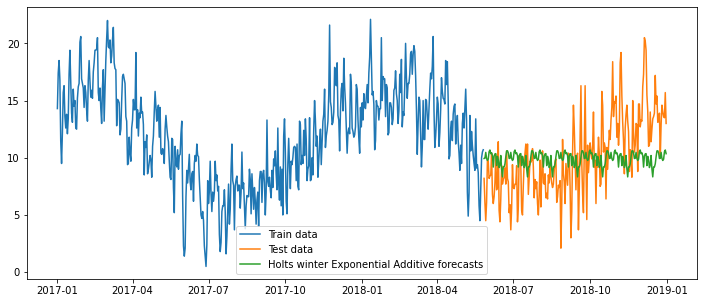

In [193]:
# plotting train, test, forecasts
plt.figure(figsize=(12,5))
plt.plot(train_dailytemp['Temperature(Min)'], label =  'Train data')
plt.plot(test_dailytemp['Temperature(Min)'] , label = 'Test data')
plt.plot(y_hwa_dailytemp['hwa_forecasts'], label = 'Holts winter Exponential Additive forecasts')
plt.legend(loc = 0)
plt.show()

In [194]:
# checking the error metrics
rmse_hwa_dailytemp = round(np.sqrt(mean_squared_error(test_dailytemp['Temperature(Min)'], y_hwa_dailytemp['hwa_forecasts'])),2)
mape_hwa_dailytemp = round(np.mean((np.abs(test_dailytemp['Temperature(Min)'] - y_hwa_dailytemp['hwa_forecasts'])/test_dailytemp['Temperature(Min)'])*100),2)
print(rmse_hwa_dailytemp, mape_hwa_dailytemp)

3.5 32.83


### Graded Questions

In [195]:
# loading the data into dataframe
bitcoin_dataframe = pd.read_csv('bitcoinfinal.csv')
# checking the head of the dataframe
bitcoin_dataframe.head()

,Month,Value
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


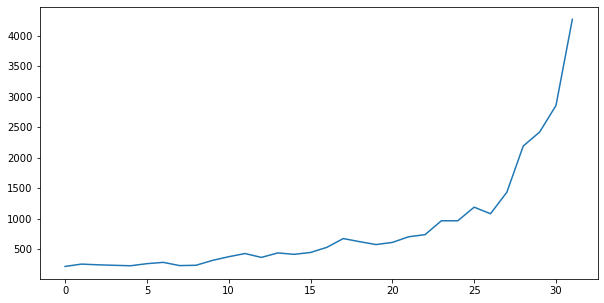

In [196]:
# checking the data variation
plt.plot(bitcoin_dataframe['Value'])
plt.show()

In [197]:
bitcoin_dataframe['Value'].head()

0    217.4
1    255.7
2    244.3
3    236.1
4    228.7
Name: Value, dtype: float64

In [198]:
# splitting the data into train and test
train_bit = bitcoin_dataframe[:29]
test_bit = bitcoin_dataframe[29:]

In [199]:
# making prediction using naive method
y_naive_bit = test_bit.copy()
# adding column to assign predictions
y_naive_bit['naive_forecasts'] = train_bit['Value'][28]
# checking the head of the dataframe
y_naive_bit.head()

,Month,Value,naive_forecasts
29,29,2420.7,2191.8
30,30,2856.0,2191.8
31,31,4268.8,2191.8


In [200]:
# making predictions using simple average method
y_sa_bit = test_bit.copy()
# adding column to represent the forecasts
y_sa_bit['sa_forecasts'] = round(train_bit['Value'].mean(),2)
# checking the head 
y_sa_bit.head()

,Month,Value,sa_forecasts
29,29,2420.7,595.75
30,30,2856.0,595.75
31,31,4268.8,595.75


In [201]:
# checking error metrics for naive
rmse_naive_bit = round(np.sqrt(mean_squared_error(test_bit['Value'], y_naive_bit['naive_forecasts'])),2)
mape_naive_bit = round(np.mean((np.abs(test_bit['Value']- y_naive_bit['naive_forecasts'])/test_bit['Value'])*100),2)
error_dataframe_bit = pd.DataFrame({'Method': ['Naive method'], 'RMSE': [rmse_naive_bit], 'MAPE': [mape_naive_bit]})
# checking the head of the datfarame
error_dataframe_bit.head()

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [202]:
rmse_sa_bit = round(np.sqrt(mean_squared_error(test_bit['Value'], y_sa_bit['sa_forecasts'])),2)
mape_sa_bit = round(np.mean((np.abs(test_bit['Value']- y_sa_bit['sa_forecasts'])/test_bit['Value'])*100),2)
temp_dataframe_bit = pd.DataFrame({'Method': ['Simple Average method'], 'RMSE': [rmse_sa_bit], 'MAPE': [mape_sa_bit]})
error_dataframe_bit = pd.concat([error_dataframe_bit, temp_dataframe_bit])
error_dataframe_bit

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple Average method,2703.73,80.19


### Simple Moving average

In [203]:
# considering window size  = 12
y_sma_bit_12 = train_bit.copy()
# creating a column to represent the forecasts
y_sma_bit_12['sma_12'] = train_bit['Value'].rolling(12).mean()
# checking the head 
y_sma_bit_12.head()

,Month,Value,sma_12
0,0,217.4,NaN
1,1,255.7,NaN
2,2,244.3,NaN
3,3,236.1,NaN
4,4,228.7,NaN


In [204]:
# making predictions on test
test_bit_12  =test_bit.copy()
# adding column
test_bit_12['sma_12'] = y_sma_bit_12['sma_12'][28]
test_bit_12.head()

,Month,Value,sma_12
29,29,2420.7,979.95
30,30,2856.0,979.95
31,31,4268.8,979.95


In [205]:
# considering window size  = 6
y_sma_bit_6 = train_bit.copy()
# creating a column to represent the forecasts
y_sma_bit_6['sma_6'] = train_bit['Value'].rolling(6).mean()
# checking the head 
y_sma_bit_6.head()

,Month,Value,sma_6
0,0,217.4,NaN
1,1,255.7,NaN
2,2,244.3,NaN
3,3,236.1,NaN
4,4,228.7,NaN


In [206]:
# making predictions on test
test_bit_6  =test_bit.copy()
# adding column
test_bit_6['sma_6'] = y_sma_bit_6['sma_6'][28]
test_bit_6.head()

,Month,Value,sma_6
29,29,2420.7,1305.1
30,30,2856.0,1305.1
31,31,4268.8,1305.1


In [207]:
# considering window size  = 3
y_sma_bit_3 = train_bit.copy()
# creating a column to represent the forecasts
y_sma_bit_3['sma_3'] = train_bit['Value'].rolling(3).mean()
# checking the head 
y_sma_bit_3.head()

,Month,Value,sma_3
0,0,217.4,NaN
1,1,255.7,NaN
2,2,244.3,239.133333
3,3,236.1,245.366667
4,4,228.7,236.366667


In [208]:
# making predictions on test
test_bit_3  =test_bit.copy()
# adding column
test_bit_3['sma_3'] = y_sma_bit_3['sma_3'][28]
test_bit_3.head()

,Month,Value,sma_3
29,29,2420.7,1569.566667
30,30,2856.0,1569.566667
31,31,4268.8,1569.566667


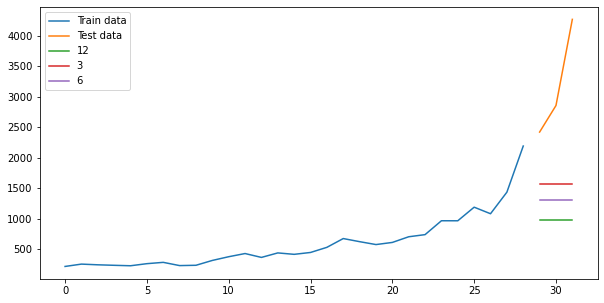

In [209]:
# plotting train , test, forecasts
plt.figure(figsize= (10,5))
plt.plot(train_bit['Value'], label = 'Train data')
plt.plot(test_bit['Value'], label  = 'Test data')
plt.plot(test_bit_12['sma_12'], label = '12')
plt.plot(test_bit_3['sma_3'], label = '3')
plt.plot(test_bit_6['sma_6'], label  ='6')
plt.legend(loc = 0)
plt.show()

In [210]:
# checking the error metrics
rmse_12 = np.sqrt(mean_squared_error(test_bit['Value'], test_bit_12['sma_12']))
mape_12  = np.mean((np.abs(test_bit['Value']- test_bit_12['sma_12'])/test_bit['Value'])*100)
rmse_3 = np.sqrt(mean_squared_error(test_bit['Value'], test_bit_3['sma_3']))
mape_3  = np.mean((np.abs(test_bit['Value']- test_bit_3['sma_3'])/test_bit['Value'])*100)
rmse_6 = np.sqrt(mean_squared_error(test_bit['Value'], test_bit_6['sma_6']))
mape_6  = np.mean((np.abs(test_bit['Value']- test_bit_6['sma_6'])/test_bit['Value'])*100)
error_dataframe_sma = pd.DataFrame({'Method': ['sma_12', 'sma_6', 'sma_3'], 'RMSE':[rmse_12, rmse_6, rmse_3], 'MAPE':[mape_12, mape_6, mape_3]})
error_dataframe_sma

,Method,RMSE,MAPE
0,sma_12,2338.935548,67.416611
1,sma_6,2035.794019,56.605356
2,sma_3,1794.918685,47.811826


### Simple Exponential Smoothing

In [211]:
# defining the model object
model_se_bit = SimpleExpSmoothing(train_bit['Value'])
# fitting the model
model_se_bit_fit = model_se_bit.fit(optimized = True)

In [212]:
# making predictions
y_se_bit = test_bit.copy()
# adding column to make forecasts
y_se_bit['se_forecasts'] = model_se_bit_fit.forecast(3)
# checking the head
y_se_bit

,Month,Value,se_forecasts
29,29,2420.7,2191.8
30,30,2856.0,2191.8
31,31,4268.8,2191.8


In [213]:
# checking the error metrics
se_rmse  = np.sqrt(mean_squared_error(test_bit['Value'], y_se_bit['se_forecasts']))
se_mape = np.mean((np.abs(test_bit['Value'] - y_se_bit['se_forecasts'])/test_bit['Value'])*100)
print(se_mape, se_rmse)

27.122534945690195 1265.8970271445198


### Holt's Exponential Smoothing

In [214]:
# defining the model object
model_he_bit = ExponentialSmoothing(np.array(train_bit['Value']), trend = 'add')
model_he_fit_bit = model_he_bit.fit(optimized = True)
model_he_fit_bit.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.4216658948437922,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 203.68202655259932,
 'initial_slope': 13.711068868376142,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [215]:
# making predictions using the model
y_he_bit = test_bit.copy()
y_he_bit['he_forecasts'] = model_he_fit_bit.forecast(3)
y_he_bit.head()

,Month,Value,he_forecasts
29,29,2420.7,2607.821745
30,30,2856.0,3023.843491
31,31,4268.8,3439.865236


In [216]:
# checking the error metrics
he_rmse  = np.sqrt(mean_squared_error(test_bit['Value'], y_he_bit['he_forecasts']))
he_mape = np.mean((np.abs(test_bit['Value'] - y_he_bit['he_forecasts'])/test_bit['Value'])*100)
print(he_mape, he_rmse)

11.008463263370253 500.10626452277796


### Holts winter model

In [217]:
# defining the model object
model_hwa_bit = ExponentialSmoothing(np.array(train_bit['Value']), trend = 'add', seasonal_periods= 3, seasonal= 'add')
model_hwa_bit_fit = model_hwa_bit.fit(optimized = True)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [218]:
# defining mul model
model_hwm_bit = ExponentialSmoothing(np.array(train_bit['Value']), trend = 'add', seasonal_periods= 3, seasonal= 'mul')
model_hwm_bit_fit = model_hwm_bit.fit(optimized = True)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [219]:
# making predictions
y_hwa_bit = test_bit.copy()
y_hwa_bit['hwa_forecasts'] = model_hwa_bit_fit.forecast(3)
y_hwm_bit = test_bit.copy()
y_hwm_bit['hwm_forecasts'] = model_hwm_bit_fit.forecast(3)

In [220]:
# error metrics for hwa
hwa_rmse  = np.sqrt(mean_squared_error(test_bit['Value'], y_hwa_bit['hwa_forecasts']))
hwa_mape = np.mean((np.abs(test_bit['Value'] - y_hwa_bit['hwa_forecasts'])/test_bit['Value'])*100)
print(hwa_mape, hwa_rmse)

10.12214521865979 515.1144328748468


In [221]:
# error metrics for hwm
hwm_rmse  = np.sqrt(mean_squared_error(test_bit['Value'], y_hwm_bit['hwm_forecasts']))
hwm_mape = np.mean((np.abs(test_bit['Value'] - y_hwm_bit['hwm_forecasts'])/test_bit['Value'])*100)
print(hwm_mape, hwm_rmse)

16.565765412179157 731.905635281681


### Sales data

In [222]:
# reading the data into dataframe
sales_dataframe = pd.read_csv('sales-data.csv', header= None)
# renaming the columns
sales_dataframe.columns = ['Month', 'Sales']
# checking the head of the dataframe
sales_dataframe.head()

,Month,Sales
0,1980-01,154
1,1980-02,96
2,1980-03,73
3,1980-04,49
4,1980-05,36


In [223]:
# changing the datatype of Month column
sales_dataframe['Month'] = pd.to_datetime(sales_dataframe['Month'])
# assigning the Month column as index
sales_dataframe.set_index('Month', inplace= True)

In [224]:
# checking the head again
sales_dataframe.head()

,Sales
Month,
1980-01-01,154
1980-02-01,96
1980-03-01,73
1980-04-01,49
1980-05-01,36


In [225]:
# checking the shape of the sales data
sales_dataframe.shape

(77, 1)

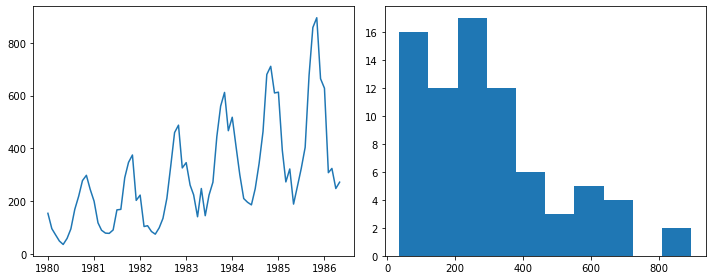

In [226]:
# checking the time series data visually
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.plot(sales_dataframe['Sales'])
plt.subplot(1,2,2)
plt.hist(sales_dataframe['Sales'])
plt.tight_layout()
plt.show()

- From the above plots we can see that the time series is not stationary. We need to convert into stationary by performing transformation and differencing.

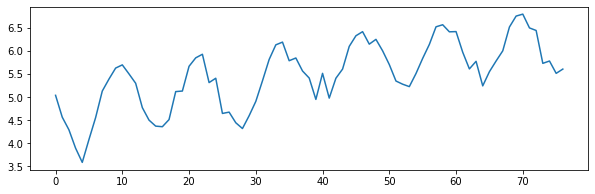

In [227]:
# performing tranformation of the data
sales_boxcox = boxcox(sales_dataframe['Sales'], lmbda = 0)
plt.figure(figsize= (10,3))
plt.plot(sales_boxcox)
plt.show()

- from above dataframe we can see that the time series is now stabilized in variance. But still there exists mean increasing because of trend in the time series.

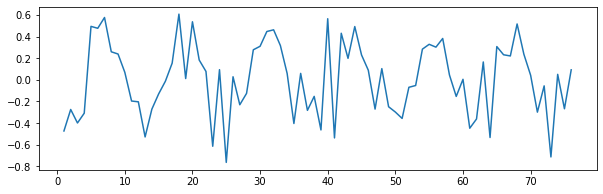

In [228]:
# performing differencing considering lag = 1 on the sales_boxcox
sales_boxcox_diff = pd.Series(sales_boxcox) - pd.Series(sales_boxcox).shift(periods= 1)
plt.figure(figsize= (10,3))
plt.plot(sales_boxcox_diff)
plt.show()

In [229]:
# defining series with new index
sales_boxcox_diff.index =  sales_dataframe.index
# dropping the null values
sales_boxcox_diff.dropna(inplace= True)
# checking the series
sales_boxcox_diff.head()

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
dtype: float64

- From above plot we can see that the time series has now become stationary.

In [230]:
# splitting the data into train and test
sales_train = sales_dataframe['Sales'][:60]
sales_test = sales_dataframe['Sales'][60:]

In [231]:
# splitting the data into train and test
train_sales_boxcox_diff = sales_boxcox_diff[:60-1]
test_sales_boxcox_diff = sales_boxcox_diff[60-1:]
# splitting the boxcox data into train and test
train_sales_boxcox = sales_boxcox[:60]
test_sales_boxcox =  sales_boxcox[60:]

In [232]:
# converting the train and test sales boxcox transformation data into dataframe
train_sales_boxcox = pd.DataFrame(train_sales_boxcox)
train_sales_boxcox.columns = ['boxcox_sales']
train_sales_boxcox.index = sales_dataframe.index[:60]
train_sales_boxcox.head()

,boxcox_sales
Month,
1980-01-01,5.036953
1980-02-01,4.564348
1980-03-01,4.290459
1980-04-01,3.891820
1980-05-01,3.583519


<Figure size 720x288 with 0 Axes>

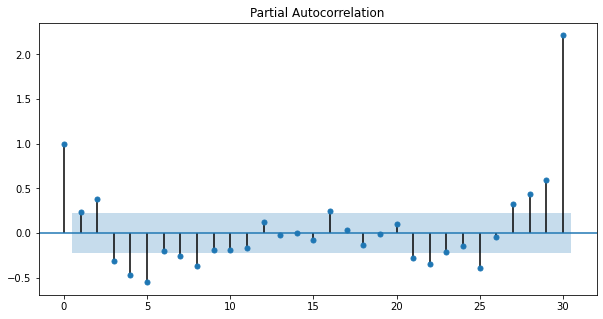

In [233]:
# plotting pacf_plot
plt.figure(figsize= (10,4))
plot_pacf(sales_boxcox_diff, lags = 30)
plt.show()

<Figure size 720x288 with 0 Axes>

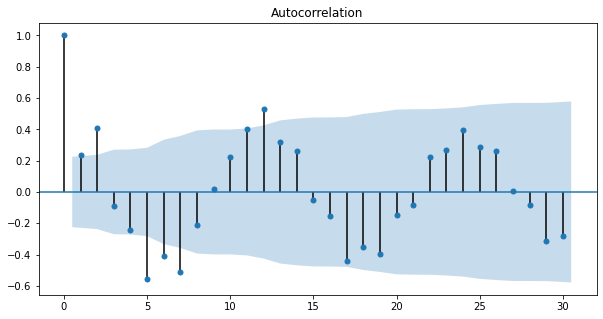

In [234]:
# plotting acf plot
plt.figure(figsize=(10,4))
plot_acf(sales_boxcox_diff, lags = 30)
plt.show()

### AR model with p=8

In [235]:
# building simple auto regressive model
sales_ar_model = ARIMA(train_sales_boxcox_diff, order = (8,0,0))
# fitting the model on top of the data
sales_ar_model_fit = sales_ar_model.fit()
# checking the params
sales_ar_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.021119
ar.L1.y   -0.430964
ar.L2.y    0.027075
ar.L3.y   -0.104882
ar.L4.y   -0.113514
ar.L5.y   -0.375209
ar.L6.y   -0.327886
ar.L7.y   -0.496640
ar.L8.y   -0.361155
dtype: float64

In [236]:
# making forecasts using simple ar model
y_sales_ar = pd.DataFrame(sales_boxcox_diff)
# adding the column to represent the forecasts
y_sales_ar['ar_forecasts_diff'] = sales_ar_model_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
# removing the diff by performing cumsum
y_sales_ar['ar_forecasts_boxcox'] = y_sales_ar['ar_forecasts_diff'].cumsum()
# adding 1st element which has been dropped during diff
y_sales_ar['ar_forecasts_boxcox'] = y_sales_ar['ar_forecasts_boxcox'].add(sales_boxcox[0])
# removing the log transformation
y_sales_ar['ar_forecasts'] = np.exp(y_sales_ar['ar_forecasts_boxcox'])
# checking the head
y_sales_ar.head()

,0,ar_forecasts_diff,ar_forecasts_boxcox,ar_forecasts
Month,,,,
1980-02-01,-0.472604,0.021119,5.058071,157.286879
1980-03-01,-0.273889,-0.158854,4.899217,134.184683
1980-04-01,-0.398639,-0.217476,4.681742,107.957920
1980-05-01,-0.308301,-0.063662,4.618080,101.299341
1980-06-01,0.494019,-0.038045,4.580035,97.517833


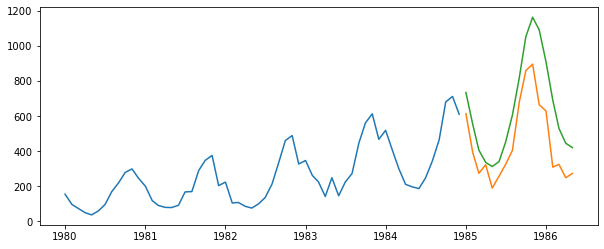

In [237]:
# plotting train, test, and forecasts
plt.figure(figsize= (10,4))
plt.plot(sales_train, label =  'Train')
plt.plot(sales_test, label = 'Test')
plt.plot(y_sales_ar['ar_forecasts'][sales_test.index.min():])
plt.show()

In [238]:
# checking the error metrics
rmse_sales_ar  = round(np.sqrt(mean_squared_error(sales_test, y_sales_ar['ar_forecasts'][sales_test.index.min():])),2)
mape_sales_ar = round(np.mean((np.abs(sales_test- y_sales_ar['ar_forecasts'][sales_test.index.min():])/sales_test)*100),2)
print(rmse_sales_ar, mape_sales_ar)

213.16 47.15


### Moving avergae q =3

In [239]:
sales_ma_model = ARIMA(train_sales_boxcox_diff, order = (0,0,3))
sales_ma_model_fit = sales_ma_model.fit()
sales_ma_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.015665
ma.L1.y    0.161512
ma.L2.y    0.534114
ma.L3.y    0.172928
dtype: float64

In [240]:
# making forecasts considering past forecasts 3 observations errors as a linear conbination
y_sales_ma = pd.DataFrame(sales_boxcox_diff)
y_sales_ma['ma_forecasts_boxcox_diff'] = sales_ma_model_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
y_sales_ma['ma_forecasts_boxcox'] =  y_sales_ma['ma_forecasts_boxcox_diff'].cumsum()
y_sales_ma['ma_forecasts_boxcox'] = y_sales_ma['ma_forecasts_boxcox'].add(sales_boxcox[0])
y_sales_ma['ma_forecasts'] = np.exp(y_sales_ma['ma_forecasts_boxcox'])
y_sales_ma.head()

,0,ma_forecasts_boxcox_diff,ma_forecasts_boxcox,ma_forecasts
Month,,,,
1980-02-01,-0.472604,0.015665,5.052617,156.431355
1980-03-01,-0.273889,-0.108159,4.944459,140.394838
1980-04-01,-0.398639,-0.215034,4.729424,113.230371
1980-05-01,-0.308301,-0.147510,4.581914,97.701254
1980-06-01,0.494019,-0.124945,4.456970,86.225814


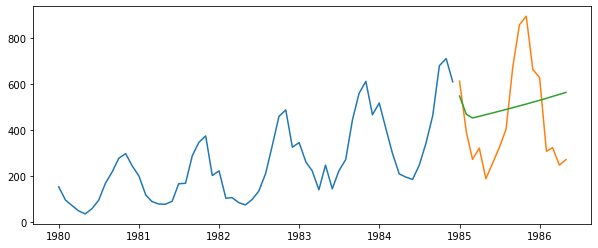

In [241]:
# plotting train ,test, forecasts
plt.figure(figsize=(10,4))
plt.plot(sales_train)
plt.plot(sales_test)
plt.plot(y_sales_ma['ma_forecasts'][sales_test.index.min():])
plt.show()

In [242]:
# checking the error metrics
rmse_sales_ma  = round(np.sqrt(mean_squared_error(sales_test, y_sales_ma['ma_forecasts'][sales_test.index.min():])),2)
mape_sales_ma = round(np.mean((np.abs(sales_test- y_sales_ma['ma_forecasts'][sales_test.index.min():])/sales_test)*100),2)
print(rmse_sales_ma, mape_sales_ma)

221.38 56.66


### ARMA model

In [243]:
# defiining the model object
sales_arma_model = ARIMA(train_sales_boxcox_diff, order = (4,0,3))
sales_arma_model_fit = sales_arma_model.fit()
sales_arma_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const      0.019247
ar.L1.y    0.255058
ar.L2.y    1.094360
ar.L3.y   -0.640848
ar.L4.y   -0.482690
ma.L1.y   -0.806490
ma.L2.y   -0.770900
ma.L3.y    0.984745
dtype: float64

In [244]:
# making predictions using arma model
y_sales_arma = pd.DataFrame(sales_boxcox_diff, columns = ['Boxcox_diff'])
y_sales_arma['arma_forecasts_boxcox_diff'] = sales_arma_model_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
y_sales_arma['arma_forecasts_boxcox'] =  y_sales_arma['arma_forecasts_boxcox_diff'].cumsum()
y_sales_arma['arma_forecasts_boxcox'] = y_sales_arma['arma_forecasts_boxcox'].add(sales_boxcox[0])
y_sales_arma['arma_forecasts'] = np.exp(y_sales_arma['arma_forecasts_boxcox'])
y_sales_arma.head()

,Boxcox_diff,arma_forecasts_boxcox_diff,arma_forecasts_boxcox,arma_forecasts
Month,,,,
1980-02-01,-0.472604,0.019247,5.056200,156.992774
1980-03-01,-0.273889,-0.119542,4.936658,139.303900
1980-04-01,-0.398639,-0.223199,4.713458,111.436886
1980-05-01,-0.308301,-0.063222,4.650236,104.609681
1980-06-01,0.494019,-0.031909,4.618327,101.324338


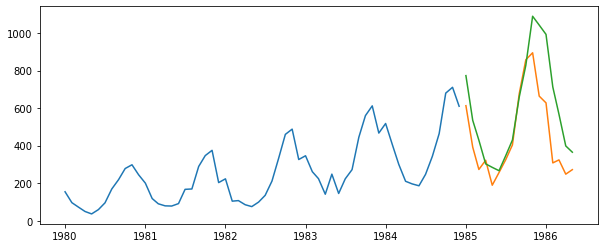

In [245]:
# plotting train ,test, forecasts
plt.figure(figsize=(10,4))
plt.plot(sales_train)
plt.plot(sales_test)
plt.plot(y_sales_arma['arma_forecasts'][sales_test.index.min():])
plt.show()

In [246]:
# checking the error metrics
rmse_sales_arma  = round(np.sqrt(mean_squared_error(sales_test, y_sales_arma['arma_forecasts'][sales_test.index.min():])),2)
mape_sales_arma = round(np.mean((np.abs(sales_test- y_sales_arma['arma_forecasts'][sales_test.index.min():])/sales_test)*100),2)
print(rmse_sales_arma, mape_sales_arma)

195.74 37.49


### ARIMA

In [247]:
# defining the model object
sales_arima_model = ARIMA(train_sales_boxcox, order = (4,1,3))
# fitting the model
sales_arima_model_fit = sales_arima_model.fit()
# checking out the parameters 
print(sales_arima_model_fit.params)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const                   0.019247
ar.L1.D.boxcox_sales    0.255058
ar.L2.D.boxcox_sales    1.094360
ar.L3.D.boxcox_sales   -0.640848
ar.L4.D.boxcox_sales   -0.482690
ma.L1.D.boxcox_sales   -0.806490
ma.L2.D.boxcox_sales   -0.770900
ma.L3.D.boxcox_sales    0.984745
dtype: float64


C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [248]:
# creating dataframe to represent the forecasts
y_sales_arima = pd.DataFrame()
# adding column to represent the forecasts
y_sales_arima['arima_forecasts_boxcox_diff'] = sales_arima_model_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
# removing the idff
y_sales_arima['arima_forecasts_boxcox'] = y_sales_arima['arima_forecasts_boxcox_diff'].cumsum()
# adding the initial value
y_sales_arima['arima_forecasts_boxcox'] = y_sales_arima['arima_forecasts_boxcox'].add(sales_boxcox[0])
# removing log transformation
y_sales_arima['arima_forecasts'] = np.exp(y_sales_arima['arima_forecasts_boxcox'])
# checking the head 
y_sales_arima.head()

,arima_forecasts_boxcox_diff,arima_forecasts_boxcox,arima_forecasts
1980-02-01,0.019247,5.056200,156.992774
1980-03-01,-0.119542,4.936658,139.303900
1980-04-01,-0.223199,4.713458,111.436886
1980-05-01,-0.063222,4.650236,104.609681
1980-06-01,-0.031909,4.618327,101.324338


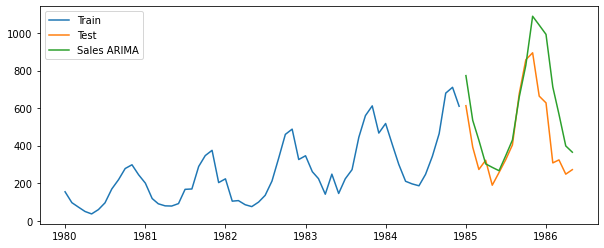

In [249]:
# plotting train, test, forecasts
plt.figure(figsize=(10,4))
plt.plot(sales_train, label = 'Train')
plt.plot(sales_test, label = 'Test')
plt.plot(y_sales_arima['arima_forecasts'][sales_test.index.min():], label =  'Sales ARIMA')
plt.legend(loc = 0)
plt.show()

In [250]:
# checking the error metrics
rmse_sales_arima  = round(np.sqrt(mean_squared_error(sales_test, y_sales_arima['arima_forecasts'][sales_test.index.min():])),2)
mape_sales_arima = round(np.mean((np.abs(sales_test- y_sales_arima['arima_forecasts'][sales_test.index.min():])/sales_test)*100),2)
print(rmse_sales_arima, mape_sales_arima)

195.74 37.49


### SARIMA

In [251]:
# defining the model object and fitting the data
from statsmodels.tsa.statespace.sarimax import SARIMAX
sales_sarima_model = SARIMAX(train_sales_boxcox['boxcox_sales'], order = (7,2,9), seasonal_order= (3,1,1,12))
sales_sarima_model_fit =  sales_sarima_model.fit()
sales_sarima_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ar.L1      -1.214789
ar.L2      -0.700812
ar.L3      -0.095837
ar.L4      -0.121908
ar.L5      -0.548525
ar.L6      -0.698341
ar.L7      -0.368296
ma.L1      -0.262530
ma.L2      -0.502399
ma.L3      -0.310854
ma.L4       0.333481
ma.L5       0.180494
ma.L6      -0.260201
ma.L7      -0.624342
ma.L8      -0.223861
ma.L9       0.689034
ar.S.L12   -0.405347
ar.S.L24   -0.252189
ar.S.L36   -0.664068
ma.S.L12   -0.255945
sigma2      0.017357
dtype: float64

In [252]:
# creating dataframe
y_sales_sarima = pd.DataFrame()
# adding column to represent the forecasts
y_sales_sarima['sarima_forecasts_boxcox'] = sales_sarima_model_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
# removing the diff
y_sales_sarima['sarima_forecasts'] = np.exp(y_sales_sarima['sarima_forecasts_boxcox'])
# checking the head of the dataframe
y_sales_sarima.head()

,sarima_forecasts_boxcox,sarima_forecasts
1980-02-01,8.394921,4424.536756
1980-03-01,4.091744,59.844181
1980-04-01,4.016570,55.510403
1980-05-01,3.493181,32.890416
1980-06-01,3.275217,26.448977


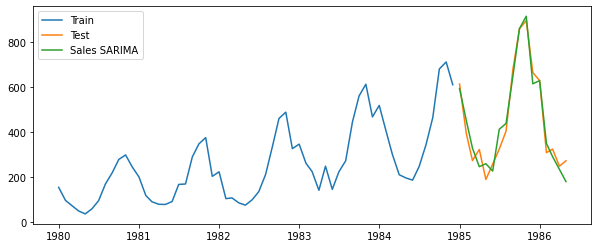

In [253]:
# plotting train, test, forecasts
plt.figure(figsize=(10,4))
plt.plot(sales_train, label = 'Train')
plt.plot(sales_test, label = 'Test')
plt.plot(y_sales_sarima['sarima_forecasts'][sales_test.index.min():], label =  'Sales SARIMA')
plt.legend(loc = 0)
plt.show()

In [254]:
# checking the error metrics
rmse_sales_sarima  = round(np.sqrt(mean_squared_error(sales_test, y_sales_sarima['sarima_forecasts'][sales_test.index.min():])),2)
mape_sales_sarima = round(np.mean((np.abs(sales_test- y_sales_sarima['sarima_forecasts'][sales_test.index.min():])/sales_test)*100),2)
print(rmse_sales_sarima, mape_sales_sarima)

50.09 13.17


### Temperature 2 data

In [255]:
# reading the dataframe
temp2_dataframe = pd.read_csv('Temperature2.csv')
# checking the head of the dataframe
temp2_dataframe.head()

,year,month,Year-Month,Temperature
0,2015,1,2015-1,-0.2
1,2015,2,2015-2,1.2
2,2015,3,2015-3,4.6
3,2015,4,2015-4,9.9
4,2015,5,2015-5,15.1


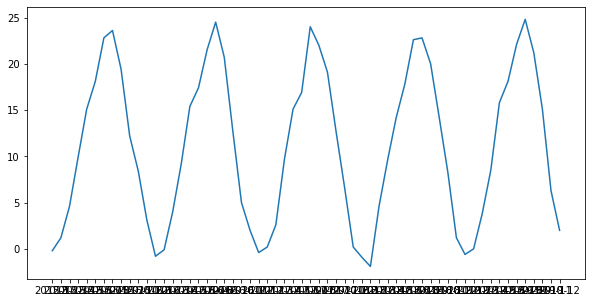

In [256]:
# plotting the data between year-month and temp
plt.plot(temp2_dataframe['Year-Month'], temp2_dataframe['Temperature'])
plt.show()

In [257]:
# checking the shape of the dataframe
temp2_dataframe.shape

(60, 4)

In [258]:
# splitting the data into train and test
train_temp2 = temp2_dataframe[:50]
test_temp2 = temp2_dataframe[50:]

In [259]:
# building holt's winter additive smoothing method
model_hwa_temp2 = ExponentialSmoothing(np.array(train_temp2['Temperature']), trend = 'add', seasonal_periods= 12, seasonal= 'add')
# fitting the data
model_hwa_temp2_fit = model_hwa_temp2.fit(optimized = True)

In [260]:
# making forecasts of the future observations
y_hwa_temp2 = pd.DataFrame(data = test_temp2['Temperature'])
# adding column to represent the forecasts
y_hwa_temp2['hwa_forecasts'] = model_hwa_temp2_fit.forecast(10)
# checking the head 
y_hwa_temp2.head()

,Temperature,hwa_forecasts
50,3.8,4.261535
51,8.5,9.881111
52,15.8,15.110402
53,18.1,17.937335
54,22.1,23.135914


In [261]:
# checking the error metrics
mape_hwa_temp2 = round(np.mean((np.abs(y_hwa_temp2['Temperature']- y_hwa_temp2['hwa_forecasts'])/y_hwa_temp2['Temperature'])*100),2)
mape_hwa_temp2

8.61

### Exchnagerate-1

In [262]:
# reading into dataframe
exchangerate1_dataframe = pd.read_csv('Exchange+Rate+1.csv')
# checking the head of the datafranme
exchangerate1_dataframe.head()

,Date,Exchange Rate
0,12-08-2019,0.8919
1,13-08-2019,0.8943
2,14-08-2019,0.8973
3,15-08-2019,0.9004
4,16-08-2019,0.9016


In [263]:
# checking the shape of the dataframe
exchangerate1_dataframe.shape

(7, 2)

In [264]:
# checking the info of the dataframe
exchangerate1_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7 non-null      object 
 1   Exchange Rate  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [265]:
# chnaging the date column data type
exchangerate1_dataframe['Date']  = pd.to_datetime(exchangerate1_dataframe['Date'])
# setting the Date column to index
exchangerate1_dataframe.set_index('Date', inplace = True)

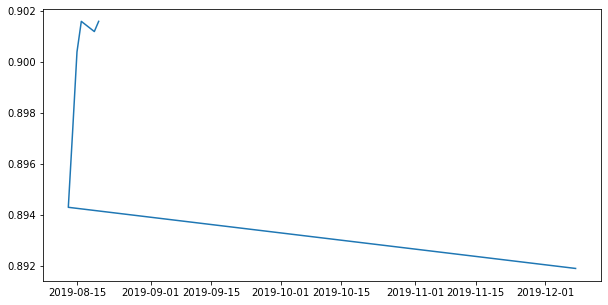

In [266]:
# plotting the data
plt.plot(exchangerate1_dataframe['Exchange Rate'])
plt.show()

In [267]:
# reading the data into dataframe
exchangerate2_dataframe = pd.read_csv('Exchange+Rate+2.csv')
exchangerate2_dataframe.head()

,Date,Exchange Rate
0,01-03-2019,0.8790
1,04-03-2019,0.8828
2,05-03-2019,0.8850
3,06-03-2019,0.8834
4,07-03-2019,0.8917


In [268]:
# checking the shape 
exchangerate2_dataframe.shape

(43, 2)

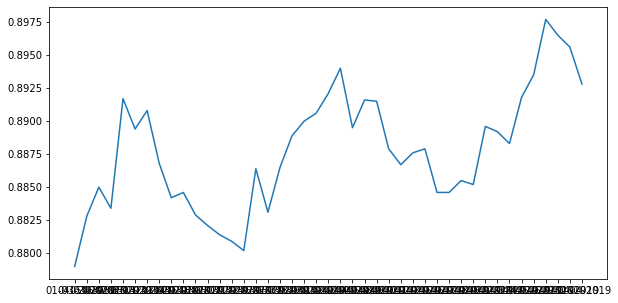

In [269]:
# plotting the data
plt.plot(exchangerate2_dataframe['Date'], exchangerate2_dataframe['Exchange Rate'])
plt.show()

## Graded Questions - 2

In [270]:
# reading the data into dataframe
unirate_datafarme = pd.read_csv('UNRATE.csv', header = None)
# renaming the columns
unirate_datafarme.columns = ['Date', 'Rate']
# checking the head of the dataframe
unirate_datafarme.head()

,Date,Rate
0,01-01-1948,3.4
1,01-02-1948,3.8
2,01-03-1948,4.0
3,01-04-1948,3.9
4,01-05-1948,3.5


In [271]:
# converting the date column and setting as index
unirate_datafarme['Date'] = pd.to_datetime(unirate_datafarme['Date'], format= '%d-%m-%Y')
unirate_datafarme.set_index('Date', inplace = True)
unirate_datafarme

,Rate
Date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2019-11-01,3.5
2019-12-01,3.5
2020-01-01,3.6


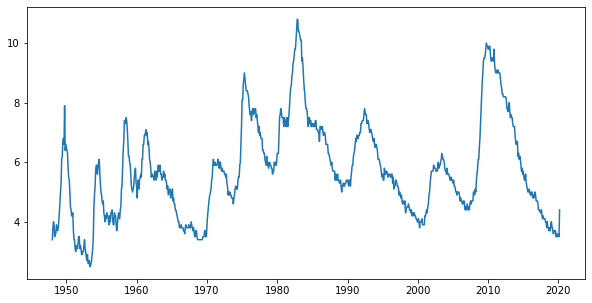

In [272]:
# checking the plot
plt.plot(unirate_datafarme['Rate'])
plt.show()

In [273]:
# checking the stationarity of the time series
adf_rate = adfuller(unirate_datafarme['Rate'])
# checking the p value of the test
adf_rate

(-3.143962829213357,
 0.023466229297777905,
 12,
 854,
 {'1%': -3.43803040357387,
  '5%': -2.864930295955726,
  '10%': -2.568575256706284},
 -424.2072262535162)

In [274]:
# splitting the data into train and test
train_rate = unirate_datafarme[:612]
test_rate = unirate_datafarme[612:]

In [275]:
# performing log transformation using boxcox
boxcox_rate = boxcox(unirate_datafarme['Rate'], lmbda = 0)
# performing 1st order differencing
boxcox_diff_rate = pd.Series(boxcox_rate) - pd.Series(boxcox_rate).shift(1)
# assigning the index of the boxcox diff series as per unirate index
boxcox_diff_rate.index = unirate_datafarme.index
# dropping Nan values from boxcox_diff_rate series
boxcox_diff_rate.dropna(inplace = True)
# checking the dataframe
boxcox_diff_rate = pd.DataFrame(boxcox_diff_rate)
boxcox_diff_rate.columns = ['Rate']
boxcox_diff_rate.head()

,Rate
Date,
1948-02-01,0.111226
1948-03-01,0.051293
1948-04-01,-0.025318
1948-05-01,-0.108214
1948-06-01,0.028171


In [276]:
# splitting the boxcox diff data into train and test
train_boxcox_diff_rate = boxcox_diff_rate[:611]
test_boxcox_diff_rate = boxcox_diff_rate[611:]
# making into dataframes
train_boxcox_diff_rate = pd.DataFrame(train_boxcox_diff_rate)
train_boxcox_diff_rate.columns = ['Rate']
test_boxcox_diff_rate = pd.DataFrame(test_boxcox_diff_rate)
test_boxcox_diff_rate.columns = ['Rate']

### AR model

In [277]:
# defining ar model object
rate_ar_model = ARIMA(train_boxcox_diff_rate['Rate'], order = (12,0,0))
# fitting the data
rate_ar_model_fit = rate_ar_model.fit()
# checking the params
rate_ar_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const          0.000466
ar.L1.Rate     0.060690
ar.L2.Rate     0.161198
ar.L3.Rate     0.118646
ar.L4.Rate     0.090456
ar.L5.Rate     0.107078
ar.L6.Rate     0.008286
ar.L7.Rate    -0.029412
ar.L8.Rate     0.032450
ar.L9.Rate     0.006197
ar.L10.Rate   -0.124660
ar.L11.Rate    0.047124
ar.L12.Rate   -0.148533
dtype: float64

In [278]:
# making predictions using model
y_ar_rate = pd.DataFrame()
# adding column to represent the forecasts
y_ar_rate['ar_forecasts_boxcox_diff'] = rate_ar_model_fit.predict(boxcox_diff_rate.index.min(), boxcox_diff_rate.index.max())
# removing the diff
y_ar_rate['ar_forecasts_boxcox'] = y_ar_rate['ar_forecasts_boxcox_diff'].cumsum()
# adding the first data point
y_ar_rate['ar_forecasts_boxcox'] = y_ar_rate['ar_forecasts_boxcox'].add(boxcox_rate[0])
# removing the log
y_ar_rate['ar_forecasts'] = np.exp(y_ar_rate['ar_forecasts_boxcox'])
# checking the head
y_ar_rate.head()

,ar_forecasts_boxcox_diff,ar_forecasts_boxcox,ar_forecasts
1948-02-01,0.000466,1.224242,3.401586
1948-03-01,0.015034,1.239276,3.453112
1948-04-01,0.030307,1.269583,3.559367
1948-05-01,0.025443,1.295026,3.651090
1948-06-01,0.005284,1.300310,3.670434


In [279]:
# checking the erroe metircs
rate_rmse_ar = round(np.sqrt(mean_squared_error(test_rate['Rate'], y_ar_rate['ar_forecasts'][test_rate.index.min():])),2)
rate_mape_ar = round(np.mean((np.abs(test_rate['Rate']-y_ar_rate['ar_forecasts'][test_rate.index.min():])/test_rate['Rate'])*100),2)
print(rate_rmse_ar, rate_mape_ar)

2.07 21.5


In [280]:
round(y_ar_rate['ar_forecasts']['1948-06-01'],2)

3.67

In [281]:
# converting boxcox_rate into dataframe
boxcox_rate_dataframe = pd.DataFrame(boxcox_rate)
boxcox_rate_dataframe.columns = ['boxcox_rate']
boxcox_rate_dataframe.index = unirate_datafarme.index
# splitting the data into train and test
train_boxcox_rate = boxcox_rate_dataframe[:612]
test_boxcox_rate = boxcox_rate_dataframe[612:]
# defining the ARIMA model object
rate_arima_model = ARIMA(train_boxcox_rate['boxcox_rate'], order = (12,1,5))
rate_arima_model_fit = rate_arima_model.fit()
print(rate_arima_model_fit.params)

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const                   0.000446
ar.L1.D.boxcox_rate    -0.427325
ar.L2.D.boxcox_rate     0.804955
ar.L3.D.boxcox_rate     0.770797
ar.L4.D.boxcox_rate    -0.553778
ar.L5.D.boxcox_rate    -0.802789
ar.L6.D.boxcox_rate     0.075587
ar.L7.D.boxcox_rate     0.062577
ar.L8.D.boxcox_rate     0.066287
ar.L9.D.boxcox_rate     0.186565
ar.L10.D.boxcox_rate    0.020795
ar.L11.D.boxcox_rate   -0.070572
ar.L12.D.boxcox_rate   -0.070362
ma.L1.D.boxcox_rate     0.455685
ma.L2.D.boxcox_rate    -0.636296
ma.L3.D.boxcox_rate    -0.598516
ma.L4.D.boxcox_rate     0.625760
ma.L5.D.boxcox_rate     0.864175
dtype: float64


C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [282]:
# making predictions using ARIMA
y_arima_rate = pd.DataFrame()
# adding column for predictions
y_arima_rate['arima_forecasts_boxcox_diff'] = rate_arima_model_fit.predict(boxcox_diff_rate.index.min(), boxcox_diff_rate.index.max())
# removing diff
y_arima_rate['arima_forecasts_boxcox'] = y_arima_rate['arima_forecasts_boxcox_diff'].cumsum()
# adding 1st element
y_arima_rate['arima_forecasts_boxcox'] = y_arima_rate['arima_forecasts_boxcox'].add(boxcox_rate[0])
# removing log
y_arima_rate['arima_forecasts'] = np.exp(y_arima_rate['arima_forecasts_boxcox'])
# checking head
y_arima_rate.head()

,arima_forecasts_boxcox_diff,arima_forecasts_boxcox,arima_forecasts
1948-02-01,0.000446,1.224222,3.401518
1948-03-01,0.012983,1.237204,3.445967
1948-04-01,0.029165,1.266370,3.547949
1948-05-01,0.028221,1.294590,3.649500
1948-06-01,0.006154,1.300745,3.672031


In [283]:
# checking metrics
rate_rmse_arima = round(np.sqrt(mean_squared_error(test_rate['Rate'], y_arima_rate['arima_forecasts'][test_rate.index.min():])),2)
rate_mape_arima = round(np.mean((np.abs(test_rate['Rate']-y_arima_rate['arima_forecasts'][test_rate.index.min():])/test_rate['Rate'])*100),2)
print(rate_rmse_arima, rate_mape_arima)

2.13 21.75


In [284]:
# defining SARIMA model
rate_sarima_model = SARIMAX(train_boxcox_rate['boxcox_rate'], order = (2,1,4), seasonal_order= (2,1,4,12))
rate_sarima_model_fit = rate_sarima_model.fit()

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [285]:
# checking the params
rate_sarima_model_fit.params

ar.L1       0.580569
ar.L2       0.156713
ma.L1      -0.556856
ma.L2      -0.027182
ma.L3       0.069783
ma.L4       0.045840
ar.S.L12   -0.919696
ar.S.L24   -0.517983
ma.S.L12   -0.304636
ma.S.L24   -0.519582
ma.S.L36   -0.392754
ma.S.L48    0.275445
sigma2      0.001488
dtype: float64

In [286]:
# making predictions
y_sarima_rate = pd.DataFrame()
# adding column to present predictions
y_sarima_rate['sarima_forecasts_boxcox'] = rate_sarima_model_fit.predict(boxcox_diff_rate.index.min(), boxcox_diff_rate.index.max())
# removing log
y_sarima_rate['sarima_forecasts'] = np.exp(y_sarima_rate['sarima_forecasts_boxcox'])
# checking the head
y_sarima_rate.head()

,sarima_forecasts_boxcox,sarima_forecasts
1948-02-01,1.223775,3.4
1948-03-01,1.335001,3.8
1948-04-01,1.386294,4.0
1948-05-01,1.360977,3.9
1948-06-01,1.252763,3.5


In [287]:
# checking error metrics
rate_rmse_sarima = round(np.sqrt(mean_squared_error(test_rate['Rate'], y_sarima_rate['sarima_forecasts'][test_rate.index.min():])),2)
rate_mape_sarima = round(np.mean((np.abs(test_rate['Rate']-y_sarima_rate['sarima_forecasts'][test_rate.index.min():])/test_rate['Rate'])*100),2)
print(rate_rmse_sarima, rate_mape_sarima)

2.31 22.6


In [288]:
rate_ma_model = ARIMA(train_boxcox_diff_rate['Rate'], order = (0,0,5))
rate_ma_model_fit  = rate_ma_model.fit()
rate_ma_model_fit.params

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const         0.000507
ma.L1.Rate    0.055504
ma.L2.Rate    0.181882
ma.L3.Rate    0.123451
ma.L4.Rate    0.099834
ma.L5.Rate    0.151700
dtype: float64

In [289]:
# making predictions
y_ma_rate = pd.DataFrame()
y_ma_rate['ma_forecasts_boxcox_diff']= rate_ma_model_fit.predict(boxcox_diff_rate.index.min(), boxcox_diff_rate.index.max())
y_ma_rate['ma_forecasts_boxcox'] =  y_ma_rate['ma_forecasts_boxcox_diff'].cumsum()
y_ma_rate['ma_forecasts_boxcox'] = y_ma_rate['ma_forecasts_boxcox'].add(boxcox_rate[0])
y_ma_rate['ma_forecasts'] = np.exp(y_ma_rate['ma_forecasts_boxcox'])
y_ma_rate.head()

,ma_forecasts_boxcox_diff,ma_forecasts_boxcox,ma_forecasts
1948-02-01,0.000507,1.224283,3.401726
1948-03-01,0.012303,1.236585,3.443834
1948-04-01,0.026871,1.263457,3.537628
1948-05-01,0.020794,1.284250,3.611959
1948-06-01,-0.000387,1.283863,3.610562
